# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Khansa Mahira
- **Email:** khansamahira011@gmail.com
- **ID Dicoding:** Khansa Mahira

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

- Pertanyaan 2: Kapan peminjaman paling banyak dan paling sedikit dilakukan? (Berdasarkan tahun, musim, bulan, hari, jam)

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

## Data Wrangling

### Gathering Data

Memuat tabel day

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hour

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day_df menampilkan data ketika peminjaman sepeda dilakukan secara harian.
- hour_df menampilkan data ketika peminjaman sepeda dilakukan sesuai jam sehingga data ini memiliki kolom hr yang merepresentasikan jam. Kolom hr tidak dimiliki oleh day_df, sedangkan kolom lain yang terdapat pada hour_df dan day_df.

### Assessing Data

Menilai data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi pada day_df: ", day_df.duplicated().sum())

Jumlah duplikasi pada day_df:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada hour_df:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data day_df dan hour_df tidak memiliki duplikasi, tidak ada data yang bernilai null, dan seluruh nilainya berada dalam rentang data yang telah ditetapkan. Namun, data dari dteday yang merepresentasikan tanggal memiliki tipe object sehingga perlu diubah ke tipe datetime pada tahap cleaning data.

### Cleaning Data

Membersihkan data day_df

In [12]:
datetime_column = ["dteday"]

In [13]:
for column in datetime_column:
  day_df[column] = pd.to_datetime(day_df[column])

In [14]:
day_df['temp_celsius'] = day_df['temp'] * (39 - (-8)) + (-8)
day_df['atemp_celsius'] = day_df['atemp'] * (50 - (-16)) + (-16)

In [15]:
day_df['hum'] = day_df['hum'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

In [16]:
day_df = day_df.drop(columns=['temp', 'atemp'])

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   dteday         731 non-null    datetime64[ns]
 2   season         731 non-null    int64         
 3   yr             731 non-null    int64         
 4   mnth           731 non-null    int64         
 5   holiday        731 non-null    int64         
 6   weekday        731 non-null    int64         
 7   workingday     731 non-null    int64         
 8   weathersit     731 non-null    int64         
 9   hum            731 non-null    float64       
 10  windspeed      731 non-null    float64       
 11  casual         731 non-null    int64         
 12  registered     731 non-null    int64         
 13  cnt            731 non-null    int64         
 14  temp_celsius   731 non-null    float64       
 15  atemp_celsius  731 non-

In [18]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_celsius,atemp_celsius
0,1,2011-01-01,1,0,1,0,6,0,2,80.5833,10.749882,331,654,985,8.175849,7.999250
1,2,2011-01-02,1,0,1,0,0,0,2,69.6087,16.652113,131,670,801,9.083466,7.346774
2,3,2011-01-03,1,0,1,0,1,1,1,43.7273,16.636703,120,1229,1349,1.229108,-3.499270
3,4,2011-01-04,1,0,1,0,2,1,1,59.0435,10.739832,108,1454,1562,1.400000,-1.999948
4,5,2011-01-05,1,0,1,0,3,1,1,43.6957,12.522300,82,1518,1600,2.666979,-0.868180


In [19]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_celsius,atemp_celsius
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,62.789406,12.762576,848.176471,3656.172367,4504.348837,15.283085,15.307363
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,14.242910,5.192357,686.622488,1560.256377,1937.211452,8.603397,10.755438
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.500244,2.000000,20.000000,22.000000,-5.220871,-10.781406
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,52.000000,9.041650,315.500000,2497.000000,3152.000000,7.842925,6.297605
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,62.666700,12.125325,713.000000,3662.000000,4548.000000,15.421651,16.124378
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,73.020850,15.625371,1096.000000,4776.500000,5956.000000,22.804575,24.167732
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,97.250000,34.000021,3410.000000,6946.000000,8714.000000,32.498349,39.499136


Membersihkan data hour_df

In [20]:
for column in datetime_column:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [21]:
hour_df['temp_celsius'] = hour_df['temp'] * (39 - (-8)) + (-8)
hour_df['atemp_celsius'] = hour_df['atemp'] * (50 - (-16)) + (-16)

In [22]:
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

In [23]:
hour_df = hour_df.drop(columns=['temp', 'atemp'])

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   dteday         17379 non-null  datetime64[ns]
 2   season         17379 non-null  int64         
 3   yr             17379 non-null  int64         
 4   mnth           17379 non-null  int64         
 5   hr             17379 non-null  int64         
 6   holiday        17379 non-null  int64         
 7   weekday        17379 non-null  int64         
 8   workingday     17379 non-null  int64         
 9   weathersit     17379 non-null  int64         
 10  hum            17379 non-null  float64       
 11  windspeed      17379 non-null  float64       
 12  casual         17379 non-null  int64         
 13  registered     17379 non-null  int64         
 14  cnt            17379 non-null  int64         
 15  temp_celsius   1737

In [25]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_celsius,atemp_celsius
0,1,2011-01-01,1,0,1,0,0,6,0,1,81.0,0.0,3,13,16,3.28,3.0014
1,2,2011-01-01,1,0,1,1,0,6,0,1,80.0,0.0,8,32,40,2.34,1.9982
2,3,2011-01-01,1,0,1,2,0,6,0,1,80.0,0.0,5,27,32,2.34,1.9982
3,4,2011-01-01,1,0,1,3,0,6,0,1,75.0,0.0,3,10,13,3.28,3.0014
4,5,2011-01-01,1,0,1,4,0,6,0,1,75.0,0.0,0,1,1,3.28,3.0014


In [26]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_celsius,atemp_celsius
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,62.722884,12.736540,35.676218,153.786869,189.463088,15.358397,15.401157
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,19.292983,8.196795,49.305030,151.357286,181.387599,9.050138,11.342114
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.060000,-16.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,48.000000,7.001500,4.000000,34.000000,40.000000,7.980000,5.997800
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,63.000000,12.998000,17.000000,115.000000,142.000000,15.500000,15.996800
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,78.000000,16.997900,48.000000,220.000000,281.000000,23.020000,24.999200
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,100.000000,56.996900,367.000000,886.000000,977.000000,39.000000,50.000000


Menggabungkan data day_df dan hour_df menjadi hour_based_df

In [27]:
# Merge the DataFrames
day_hour_df = pd.merge(
    hour_df,
    day_df[['instant', 'dteday', 'weathersit', 'temp_celsius', 'atemp_celsius', 'hum', 'windspeed', 'casual', 'registered', 'cnt']], #select the columns from day_df
    on='dteday',
    how='outer',
    suffixes=('_hour', '_day')  # Rename suffixes
)

In [28]:
day_hour_df.head()

,instant_hour,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit_hour,...,atemp_celsius_hour,instant_day,weathersit_day,temp_celsius_day,atemp_celsius_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,3.0014,1,2,8.175849,7.99925,80.5833,10.749882,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,1.9982,1,2,8.175849,7.99925,80.5833,10.749882,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.9982,1,2,8.175849,7.99925,80.5833,10.749882,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,3.0014,1,2,8.175849,7.99925,80.5833,10.749882,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0014,1,2,8.175849,7.99925,80.5833,10.749882,331,654,985


In [29]:
day_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant_hour        17379 non-null  int64         
 1   dteday              17379 non-null  datetime64[ns]
 2   season              17379 non-null  int64         
 3   yr                  17379 non-null  int64         
 4   mnth                17379 non-null  int64         
 5   hr                  17379 non-null  int64         
 6   holiday             17379 non-null  int64         
 7   weekday             17379 non-null  int64         
 8   workingday          17379 non-null  int64         
 9   weathersit_hour     17379 non-null  int64         
 10  hum_hour            17379 non-null  float64       
 11  windspeed_hour      17379 non-null  float64       
 12  casual_hour         17379 non-null  int64         
 13  registered_hour     17379 non-null  int64     

In [30]:
day_hour_df.isna().sum()

instant_hour          0
dteday                0
season                0
yr                    0
mnth                  0
hr                    0
holiday               0
weekday               0
workingday            0
weathersit_hour       0
hum_hour              0
windspeed_hour        0
casual_hour           0
registered_hour       0
cnt_hour              0
temp_celsius_hour     0
atemp_celsius_hour    0
instant_day           0
weathersit_day        0
temp_celsius_day      0
atemp_celsius_day     0
hum_day               0
windspeed_day         0
casual_day            0
registered_day        0
cnt_day               0
dtype: int64

In [31]:
print("Jumlah duplikasi pada day_hour_df: ", day_hour_df.duplicated().sum())

Jumlah duplikasi pada day_hour_df:  0


In [32]:
day_hour_df.describe()

,instant_hour,season,yr,mnth,hr,holiday,weekday,workingday,weathersit_hour,hum_hour,...,atemp_celsius_hour,instant_day,weathersit_day,temp_celsius_day,atemp_celsius_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,62.722884,...,15.401157,367.172622,1.391680,15.358397,15.401157,62.722884,12.736539,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,19.292983,...,11.342114,210.072051,0.540501,8.574929,10.720122,14.177918,5.172685,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,-16.000000,1.000000,1.000000,-5.220871,-10.781406,0.000000,1.500244,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,48.000000,...,5.997800,185.000000,1.000000,7.980000,6.331958,52.000000,9.041650,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,63.000000,...,15.996800,367.000000,1.000000,15.617500,16.348052,62.583300,12.124789,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,78.000000,...,24.999200,549.000000,2.000000,22.824151,24.292208,72.958300,15.624668,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,100.000000,...,50.000000,731.000000,3.000000,32.498349,39.499136,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Insight:**
- Kolom dteday pada data day_df dan hour_df diubah dari object menjadi datetime sehingga dapat merepresentasikan tanggal peminjaman sepeda.
- Kolom temp, atemp, hum, dan windspeed perlu disesuaikan menjadi nilai sebenarnya sehingga tidak berada dalam rentang 0 sampai 1.

## Exploratory Data Analysis (EDA)

### Explore subset dari day_hour_df berupa day_based_df

In [33]:
day_based_df = day_hour_df[['instant_day', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit_day', 'temp_celsius_day', 'atemp_celsius_day', 'hum_day', 'windspeed_day', 'casual_day', 'registered_day', 'cnt_day']].copy()

In [34]:
print("Jumlah duplikasi pada day_based_df: ", day_based_df.duplicated().sum())

Jumlah duplikasi pada day_based_df:  16648


In [35]:
day_based_df.drop_duplicates(inplace=True)

In [36]:
day_based_df.isna().sum()

instant_day          0
dteday               0
season               0
yr                   0
mnth                 0
holiday              0
weekday              0
workingday           0
weathersit_day       0
temp_celsius_day     0
atemp_celsius_day    0
hum_day              0
windspeed_day        0
casual_day           0
registered_day       0
cnt_day              0
dtype: int64

In [37]:
day_based_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 17355
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant_day        731 non-null    int64         
 1   dteday             731 non-null    datetime64[ns]
 2   season             731 non-null    int64         
 3   yr                 731 non-null    int64         
 4   mnth               731 non-null    int64         
 5   holiday            731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   workingday         731 non-null    int64         
 8   weathersit_day     731 non-null    int64         
 9   temp_celsius_day   731 non-null    float64       
 10  atemp_celsius_day  731 non-null    float64       
 11  hum_day            731 non-null    float64       
 12  windspeed_day      731 non-null    float64       
 13  casual_day         731 non-null    int64         
 14  register

In [38]:
day_based_df.describe()

,instant_day,season,yr,mnth,holiday,weekday,workingday,weathersit_day,temp_celsius_day,atemp_celsius_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,15.283085,15.307363,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,8.603397,10.755438,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-5.220871,-10.781406,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.842925,6.297605,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,15.421651,16.124378,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,22.804575,24.167732,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,32.498349,39.499136,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [39]:
day_based_df.head()

,instant_day,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit_day,temp_celsius_day,atemp_celsius_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,80.5833,10.749882,331,654,985
24,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,69.6087,16.652113,131,670,801
47,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
69,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
92,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,43.6957,12.522300,82,1518,1600


### Explore pertanyaan 1 menggunakan kondisi cuaca dan jumlah peminjaman sepeda

Kategori weathersit

In [40]:
weathersit_hour_nunique = day_hour_df['weathersit_hour'].nunique()
weathersit_day_nunique = day_hour_df['weathersit_day'].nunique()

print("Number of unique values in 'weathersit_hour':", weathersit_hour_nunique)
print("Number of unique values in 'weathersit_day':", weathersit_day_nunique)

Number of unique values in 'weathersit_hour': 4
Number of unique values in 'weathersit_day': 3


Kode berikut menampilkan kondisi suhu, kelembapan serta kecepatan angin sesuai jenis cuaca

In [41]:
day_hour_df.groupby(by="weathersit_hour").agg({
  "temp_celsius_hour": ["min", "max", "mean"],
  "atemp_celsius_hour": ["min", "max", "mean"],
  "hum_hour": ["min", "max", "mean"],
  "windspeed_hour": ["min", "max", "mean"]
})

temp_celsius_hour                   atemp_celsius_hour  \
                              min    max       mean                min   
weathersit_hour                                                          
1                           -7.06  39.00  16.019541           -16.0000   
2                           -7.06  37.12  14.298935           -16.0000   
3                           -4.24  35.24  13.464327           -12.9970   
4                           -1.42   2.34   0.773333            -6.9976   

                                    hum_hour                   windspeed_hour  \
                     max       mean      min    max       mean            min   
weathersit_hour                                                                 
1                50.0000  16.233511      8.0  100.0  57.374660         0.0000   
2                42.9974  14.134978      0.0  100.0  69.880722         0.0000   
3                42.9974  12.801479      0.0  100.0  82.763214         0.0000   
4                -0.9982  -3.664600     86.0   93.0  88.333333         6.0032   

                                     
                     max       mean  
weathersit_hour                      
1                54.0020  12.767059  
2                47.9988  12.058220  
3                56.9969  14.661253  
4                22.0028  13.668000

Kode berikut menampilkan kondisi suhu, kelembapan serta kecepatan angin sesuai jenis cuaca berdasarkan tanggal

In [42]:
day_hour_df.groupby(by=["dteday", "weathersit_hour"]).agg({
  "temp_celsius_hour": ["min", "max", "mean"],
  "atemp_celsius_hour": ["min", "max", "mean"],
  "hum_hour": ["min", "max", "mean"],
  "windspeed_hour": ["min", "max", "mean"]
})

temp_celsius_hour                    \
                                         min    max       mean   
dteday     weathersit_hour                                       
2011-01-01 1                            1.40  11.74   4.925000   
           2                            3.28  13.62  11.364000   
           3                           11.74  11.74  11.740000   
2011-01-02 1                            2.34   7.98   5.160000   
           2                            8.92  13.62  10.878333   
...                                      ...    ...        ...   
2012-12-29 3                            1.40   4.22   2.105000   
2012-12-30 1                            1.40   7.98   4.043750   
           2                            3.28   4.22   3.985000   
2012-12-31 1                           -1.42   4.22   0.695000   
           2                            0.46   5.16   3.593333   

                           atemp_celsius_hour                     hum_hour  \
                                          min      max       mean      min   
dteday     weathersit_hour                                                   
2011-01-01 1                           1.0016  11.9972   4.499600     75.0   
           2                           1.0016  13.9970  11.399240     72.0   
           3                          11.9972  11.9972  11.997200     88.0   
2011-01-02 1                          -2.0014   5.9978   1.166600     39.0   
           2                           5.9978  13.9970   9.998500     46.0   
...                                       ...      ...        ...      ...   
2012-12-29 3                          -0.0016  -0.0016  -0.001600     81.0   
2012-12-30 1                          -2.9980   7.9976  -0.687175     36.0   
           2                          -2.9980   1.0016  -0.749050     44.0   
2012-12-31 1                          -6.0010   1.9982  -3.166850     55.0   
           2                          -2.0014   3.0014   0.667200     44.0   

                                             windspeed_hour           \
                              max       mean            min      max   
dteday     weathersit_hour                                             
2011-01-01 1                 86.0  78.500000         0.0000  19.0012   
           2                 94.0  81.600000         6.0032  19.9995   
           3                 88.0  88.000000        16.9979  16.9979   
2011-01-02 1                 57.0  45.500000        11.0014  30.0026   
           2                100.0  79.333333         8.9981  22.0028   
...                           ...        ...            ...      ...   
2012-12-29 3                100.0  93.500000         0.0000   8.9981   
2012-12-30 1                 61.0  45.750000         0.0000  43.9989   
           2                 60.0  53.500000        11.0014  27.9993   
2012-12-31 1                 69.0  61.583333         7.0015  12.9980   
           2                 69.0  53.916667         6.0032  15.0013   

                                       
                                 mean  
dteday     weathersit_hour             
2011-01-01 1                 4.583358  
           2                16.900080  
           3                16.997900  
2011-01-02 1                20.000617  
           2                16.082792  
...                               ...  
2012-12-29 3                 3.750325  
2012-12-30 1                24.688244  
           2                21.125100  
2012-12-31 1                10.166133  
           2                10.583208  

[1570 rows x 12 columns]

Kode berikut menampilkan kondisi suhu, kelembapan serta kecepatan angin sesuai musim dan tahun

In [43]:
day_hour_df.groupby(by=[day_based_df['dteday'].dt.year.rename('year'), "season"]).agg({
  "temp_celsius_hour": ["min", "max", "mean"],
  "atemp_celsius_hour": ["min", "max", "mean"],
  "hum_hour": ["min", "max", "mean"],
  "windspeed_hour": ["min", "max", "mean"]
})

temp_celsius_hour                   atemp_celsius_hour           \
                            min    max       mean                min      max   
year   season                                                                   
2011.0 1                  -6.12  20.20   3.729111           -14.0002  24.9992   
       2                   2.34  26.78  15.469348            -0.9982  30.9986   
       3                  11.74  30.54  23.060000            11.9972  38.9978   
       4                   1.40  21.14  10.842247            -2.9980  20.0030   
2012.0 1                  -4.24  19.26   6.482198           -12.0004  20.0030   
       2                   7.04  24.90  16.746522             3.0014  28.0022   
       3                  15.50  30.54  23.460000            -0.0016  36.0014   
       4                   2.34  22.08  10.588764            -2.0014  24.9992   

                         hum_hour                   windspeed_hour           \
                    mean      min    max       mean            min      max   
year   season                                                                 
2011.0 1        0.866960      0.0  100.0  62.522222            0.0  32.9975   
       2       15.695639     28.0  100.0  72.271739            0.0  26.0027   
       3       25.043504     43.0  100.0  72.234043            0.0  23.9994   
       4       10.044861     44.0  100.0  76.842697            0.0  27.9993   
2012.0 1        4.241475     26.0  100.0  62.340659            0.0  39.0007   
       2       17.369959     23.0   94.0  65.347826            0.0  36.9974   
       3       25.181683     33.0   94.0  71.776596            0.0  22.0028   
       4        9.988056     37.0  100.0  69.842697            0.0  31.0009   

                          
                    mean  
year   season             
2011.0 1       13.111453  
       2       11.435152  
       3        9.925765  
       4        9.269939  
2012.0 1       13.330055  
       2       11.912964  
       3        8.468586  
       4        9.832212

Kode berikut menampilkan kondisi suhu, kelembapan serta kecepatan angin sesuai bulan dan tahun

In [44]:
day_hour_df.groupby(by=[day_based_df['dteday'].dt.year.rename('year'), day_based_df['dteday'].dt.month.rename('month')]).agg({
  "temp_celsius_hour": ["min", "max", "mean"],
  "atemp_celsius_hour": ["min", "max", "mean"],
  "hum_hour": ["min", "max", "mean"],
  "windspeed_hour": ["min", "max", "mean"]
})

temp_celsius_hour                   atemp_celsius_hour           \
                           min    max       mean                min      max   
year   month                                                                   
2011.0 1.0               -6.12  13.62   0.702581           -14.0002  13.9970   
       2.0               -3.30  14.56   3.615714           -10.9972  15.0002   
       3.0                1.40  20.20   6.554839            -4.0012  24.9992   
       4.0                4.22  22.08  12.836667             1.0016  24.9992   
       5.0                8.92  24.90  16.925161             7.0010  28.0022   
       6.0               18.32  26.78  22.644000            18.9998  30.9986   
       7.0               21.14  30.54  25.536774            22.0028  38.9978   
       8.0               18.32  29.60  23.201935            18.9998  32.9984   
       9.0               11.74  24.90  19.479333            11.9972  28.0022   
       10.0               2.34  19.26  12.801290            -2.0014  20.0030   
       11.0               3.28  18.32   9.672000            -0.0016  18.9998   
       12.0               1.40  15.50   6.251613            -2.9980  15.9968   
2012.0 1.0               -4.24  13.62   4.432258           -12.0004  13.9970   
       2.0               -3.30  13.62   6.229655           -10.9972  13.9970   
       3.0                2.34  19.26  12.225161            -2.0014  20.0030   
       4.0                7.04  23.02  13.024667             3.9980  24.9992   
       5.0               13.62  24.90  19.108387            13.9970  28.0022   
       6.0               16.44  27.72  21.578667            17.0000  32.0018   
       7.0               20.20  30.54  25.233548            20.0030  36.0014   
       8.0               20.20  26.78  23.717419            -0.0016  30.9986   
       9.0               13.62  26.78  19.573333            13.9970  30.0020   
       10.0               6.10  22.08  14.105161             1.9982  24.0026   
       11.0               2.34  16.44   6.695333            -2.0014  17.0000   
       12.0               0.46  15.50   6.706452            -4.0012  15.9968   

                        hum_hour                   windspeed_hour           \
                   mean      min    max       mean            min      max   
year   month                                                                 
2011.0 1.0    -3.096148     41.0   93.0  62.290323            0.0  26.0027   
       2.0     0.750329     12.0   93.0  59.321429            0.0  32.9975   
       3.0     4.257955      0.0  100.0  62.709677            0.0  31.0009   
       4.0    12.833200     39.0  100.0  70.200000            0.0  23.9994   
       5.0    17.387058     44.0  100.0  80.096774            0.0  16.9979   
       6.0    24.667220     38.0   89.0  68.800000            0.0  23.9994   
       7.0    28.452065     47.0   89.0  66.838710            0.0  19.9995   
       8.0    25.323877     43.0   89.0  70.935484            0.0  23.9994   
       9.0    19.634720     65.0  100.0  85.333333            0.0  23.9994   
       10.0   12.644852     44.0   94.0  78.903226            0.0  26.0027   
       11.0    8.832720     45.0   94.0  74.666667            0.0  27.9993   
       12.0    4.387187     47.0  100.0  70.935484            0.0  22.0028   
2012.0 1.0     1.580910     26.0  100.0  62.290323            0.0  31.0009   
       2.0     3.999138     38.0   87.0  60.793103            0.0  26.0027   
       3.0    11.645271     26.0   94.0  64.580645            0.0  35.0008   
       4.0    12.933080     23.0   82.0  55.600000            0.0  36.9974   
       5.0    20.162252     42.0   89.0  73.225806            0.0  22.0028   
       6.0    23.367240     33.0   94.0  63.666667            0.0  27.9993   
       7.0    27.710735     48.0   89.0  71.000000            0.0  19.9995   
       8.0    25.033052     57.0   89.0  74.225806            0.0  19.0012   
       9.0    20.533860     38.0   94.0  72.166667        

Kode berikut menampilkan jumlah peminjaman sesuai cuaca

In [45]:
day_hour_df.groupby(by="weathersit_hour").agg({
  "casual_hour": ["sum", "min", "max", "mean"],
  "registered_hour": ["sum", "min", "max", "mean"],
  "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                     registered_hour           \
                        sum min  max       mean             sum min  max   
weathersit_hour                                                            
1                    462745   0  367  40.545431         1875428   0  886   
2                    134481   0  350  29.595290          661471   0  822   
3                     22783   0  263  16.055673          135548   0  791   
4                         8   1    6   2.666667             215  22  158   

                            cnt_hour                       
                       mean      sum min  max        mean  
weathersit_hour                                            
1                164.323841  2338173   1  977  204.869272  
2                145.570202   795952   1  957  175.165493  
3                 95.523608   158331   1  891  111.579281  
4                 71.666667      223  23  164   74.333333

In [46]:
day_hour_df.groupby(by=["dteday", "weathersit_hour"]).agg({
  "casual_hour": ["sum", "min", "max", "mean"],
  "registered_hour": ["sum", "min", "max", "mean"],
  "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                    registered_hour      \
                                   sum min max       mean             sum min   
dteday     weathersit_hour                                                      
2011-01-01 1                        98   0  29   8.166667             207   0   
           2                       218   0  47  21.800000             390   1   
           3                        15   6   9   7.500000              57  26   
2011-01-02 1                        24   0  11   4.000000             141   8   
           2                        75   0  20   6.250000             342   1   
...                                ...  ..  ..        ...             ...  ..   
2012-12-29 3                        31   5  13   7.750000             187  35   
2012-12-30 1                       349   0  49  21.812500            1202  13   
           2                        15   0  12   1.875000             230   2   
2012-12-31 1                        56   0  13   4.666667             542   1   
           2                       383   8  69  31.916667            1748  81   

                                            cnt_hour                       
                            max        mean      sum min  max        mean  
dteday     weathersit_hour                                                 
2011-01-01 1                 55   17.250000      305   1   84   25.416667  
           2                 71   39.000000      608   1  110   60.800000  
           3                 31   28.500000       72  35   37   36.000000  
2011-01-02 1                 58   23.500000      165   8   65   27.500000  
           2                 73   28.500000      417   1   93   34.750000  
...                         ...         ...      ...  ..  ...         ...  
2012-12-29 3                 71   46.750000      218  41   84   54.500000  
2012-12-30 1                121   75.125000     1551  13  169   96.937500  
           2                113   28.750000      245   2  125   30.625000  
2012-12-31 1                187   45.166667      598   1  196   49.833333  
           2                246  145.666667     2131  89  315  177.583333  

[1570 rows x 12 columns]

In [47]:
day_hour_df.groupby(by=[day_based_df['dteday'].dt.month.rename('month'), "weathersit_hour"]).agg({
  "casual_hour": ["sum", "min", "max", "mean"],
  "registered_hour": ["sum", "min", "max", "mean"],
  "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                    registered_hour           \
                              sum min max       mean             sum min  max   
month weathersit_hour                                                           
1.0   1                        99   0  15   2.675676             968   3   81   
      2                        46   0   6   2.000000             349   3   38   
      3                         0   0   0   0.000000              27   3   24   
2.0   1                       112   0  12   3.200000             881   6   81   
      2                        78   0  12   4.333333             523   6   65   
      3                         1   0   1   0.250000              47   2   21   
3.0   1                       265   0  45   6.973684            1180   5  111   
      2                       112   0  26   6.588235             539   6   87   
      3                         9   0   3   1.285714              55   0   21   
4.0   1                       362   0  31   9.526316            1425   5  111   
      2                       149   0  33   9.312500             621  12   94   
      3                        13   0   6   2.166667              89   6   36   
5.0   1                       710   4  68  19.722222            2123  12  128   
      2                       290   0  48  13.809524             840  14  111   
      3                        26   2  12   5.200000             145  22   32   
6.0   1                       770   2  54  15.714286            2893  15  152   
      2                        58   2  16   7.250000             331  25   81   
      3                        19   4   8   6.333333             151  25   65   
7.0   1                      1046   3  63  22.255319            3073  19  170   
      2                       195   1  35  16.250000             683  17  156   
      3                        24   2  11   8.000000             156  32   92   
8.0   1                       701   3  44  14.604167            2571  16  143   
      2                       122   1  27  12.200000             607  15  114   
      3                        35   0  19   8.750000             143   1   71   
9.0   1                       623   3  38  15.195122            2664  11  169   
      2                       256   1  42  18.285714             704  12  136   
      3                         9   1   3   1.800000              59   7   15   
10.0  1                       509   1  46  12.119048            2552  13  218   
      2                        90   0  19   6.923077             403  14   65   
      3                        53   0  20   7.571429             396  19  105   
11.0  1                       239   0  16   5.558140            1732  10  110   
      2                       118   1  49   7.866667             713  13  234   
      3                         1   0   1   0.500000              28  14   14   
12.0  1                       154   0  19   4.277778            1302   4   99   
      2                        86   0  15   4.300000             835   8  108   
      3                         7   0   3   1.166667              86   3   29   

                                 cnt_hour                      
                            mean      sum min  max       mean  
month weathersit_hour                                          
1.0   1                26.162162     1067   5   96  28.837838  
      2                15.173913      395   3   42  17.173913  
      3                13.500000       27   3   24  13.500000  
2.0   1                25.171429      993   6   86  28.371429  
      2                29.055556      601   7   74  33.388889  
      3                11.750000       48   2   21  12.000000  
3.0   1                31.052632     1445   7  156  38.026316  
      2                31.705882      651   6  100  38.294118  
      3                 7.857143       64   3   22   9.142857  
4.0   1                37.500000     1787   6  142  47.026316  
      2                38.8125

In [48]:
day_hour_df.groupby(by=[day_based_df['dteday'].dt.year.rename('year'), day_based_df['dteday'].dt.month.rename('month'), "weathersit_hour"]).agg({
  "casual_hour": ["sum", "min", "max", "mean"],
  "registered_hour": ["sum", "min", "max", "mean"],
  "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                   registered_hour  \
                                     sum min max      mean             sum   
year   month weathersit_hour                                                 
2011.0 1.0   1                        28   0   6  1.473684             285   
             2                        18   0   4  1.500000             134   
       2.0   1                        57   0  12  3.166667             328   
             2                        24   0   7  3.428571             120   
             3                         1   0   1  0.333333              26   
...                                  ...  ..  ..       ...             ...   
2012.0 11.0  2                        79   1  49  9.875000             527   
             3                         1   1   1  1.000000              14   
       12.0  1                        50   0   9  3.571429             604   
             2                        48   0  15  4.000000             600   
             3                         5   0   3  1.000000              79   

                                                 cnt_hour                      
                             min  max       mean      sum min  max       mean  
year   month weathersit_hour                                                   
2011.0 1.0   1                 3   33  15.000000      313   5   39  16.473684  
             2                 3   24  11.166667      152   3   25  12.666667  
       2.0   1                 6   37  18.222222      385   6   39  21.388889  
             2                 6   36  17.142857      144   7   39  20.571429  
             3                 2   16   8.666667       27   2   16   9.000000  
...                           ..  ...        ...      ...  ..  ...        ...  
2012.0 11.0  2                18  234  65.875000      606  23  283  75.750000  
             3                14   14  14.000000       15  15   15  15.000000  
       12.0  1                12   99  43.142857      654  12  108  46.714286  
             2                 8  108  50.000000      648   9  118  54.000000  
             3                 3   29  15.800000       84   3   31  16.800000  

[69 rows x 12 columns]

In [49]:
day_hour_df.groupby(by=["season", "weathersit_hour"]).agg({
  "casual_hour": ["sum", "min", "max", "mean"],
  "registered_hour": ["sum", "min", "max", "mean"],
  "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                     registered_hour      \
                               sum min  max       mean             sum min   
season weathersit_hour                                                       
1      1                     44462   0  367  16.683677          280816   0   
       2                     14760   0  226  12.248963          109445   0   
       3                      1392   0   31   3.772358           20250   0   
       4                         8   1    6   2.666667             215  22   
2      1                    151197   0  361  52.884575          513266   0   
       2                     44912   0  311  39.258741          162451   0   
       3                      7413   0  241  18.258621           39350   0   
3      1                    174014   0  327  53.053049          627927   0   
       2                     42350   0  350  44.720169          170582   1   
       3                      9727   0  263  36.159851           36529   0   
4      1                     93072   0  362  35.673438          453419   0   
       2                     32459   0  310  26.008814          218993   1   
       3                      4251   0  131  11.336000           39419   1   

                                        cnt_hour                       
                        max        mean      sum min  max        mean  
season weathersit_hour                                                 
1      1                681  105.371857   325278   1  801  122.055535  
       2                623   90.825726   124205   1  712  103.074689  
       3                505   54.878049    21642   1  520   58.650407  
       4                158   71.666667      223  23  164   74.333333  
2      1                782  179.526408   664463   1  873  232.410983  
       2                726  142.002622   207363   1  957  181.261364  
       3                688   96.921182    46763   1  782  115.179803  
3      1                886  191.441159   801941   1  977  244.494207  
       2                751  180.128828   212932   2  868  224.848997  
       3                786  135.795539    46256   1  891  171.955390  
4      1                876  173.790341   546491   1  967  209.463779  
       2                822  175.475160   251452   1  905  201.483974  
       3                791  105.117333    43670   1  856  116.453333

In [50]:
day_hour_df.groupby(by=[day_based_df['dteday'].dt.year.rename('year'), "season", "weathersit_hour"]).agg({
  "casual_hour": ["sum", "min", "max", "mean"],
  "registered_hour": ["sum", "min", "max", "mean"],
  "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                    registered_hour  \
                                      sum min max       mean             sum   
year   season weathersit_hour                                                  
2011.0 1      1                       140   0  12   2.592593             863   
              2                       107   0  26   3.689655             501   
              3                         6   0   3   0.857143              45   
       2      1                       752   0  68  12.965517            2261   
              2                       219   0  33   8.423077             810   
              3                        23   0   8   2.875000             153   
       3      1                      1249   3  63  17.591549            3421   
              2                       214   1  31  14.266667             548   
              3                        47   0  19   5.875000             201   
       4      1                       523   0  46   7.691176            2676   
              2                       140   0  37   7.777778             596   
              3                         4   0   4   1.333333              76   
2012.0 1      1                       229   0  27   4.403846            1825   
              2                       119   0  13   3.718750             974   
              3                         4   0   3   0.571429              99   
       2      1                       974   1  54  15.460317            3779   
              2                       285   0  48  12.954545            1010   
              3                        29   0  12   4.142857             164   
       3      1                      1216   2  59  17.882353            4955   
              2                       337   1  42  16.047619            1373   
              3                        30   2  11   6.000000             232   
       4      1                       507   0  37   9.053571            3584   
              2                       179   0  49   7.458333            1336   
              3                        54   0  20   6.000000             412   

                                                  cnt_hour                      
                              min  max       mean      sum min  max       mean  
year   season weathersit_hour                                                   
2011.0 1      1                 3   37  15.981481     1003   5   40  18.574074  
              2                 3   50  17.275862      608   3   76  20.965517  
              3                 0   16   6.428571       51   2   16   7.285714  
       2      1                 5  109  38.982759     3013   6  177  51.948276  
              2                 8   78  31.153846     1029  11  106  39.576923  
              3                 3   61  19.125000      176   3   69  22.000000  
       3      1                11  112  48.183099     4670  16  154  65.774648  
              2                12   90  36.533333      762  13  121  50.800000  
              3                 1   71  25.125000      248   1   90  31.000000  
       4      1                10  106  39.352941     3199  13  130  47.044118  
              2                13  136  33.111111      736  15  173  40.888889  
              3                14   43  25.333333       80  14   47  26.666667  
2012.0 1      1                 8   81  35.096154     2054   8  107  39.500000  
              2                 8   87  30.437500     1093   9  100  34.156250  
              3                 3   24  14.142857      103   3   24  14.714286  
       2      1                 9  152  59.984127     4753  10  206  75.444444  
              2                13  111  45.909091     1295  13  137  58.863636  
              3                 6   36  23.428571      193   6   40  27.571429  
       3      1                27  170  72.867647     6171  32  207  90.750000  
              2                19  156  65.380952     1710  26  191  81.428571  
      

### Explore pertanyaan 2 berupa jumlah peminjaman sepeda berdasarkan karakteristik jam, hari, bulan, musim, dan tahun

In [51]:
day_hour_df.groupby(by="hr").agg({
  "casual_hour": ["sum", "min", "max", "mean"],
  "registered_hour": ["sum", "min", "max", "mean"],
  "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                     registered_hour                       \
           sum min  max       mean             sum min  max        mean   
hr                                                                        
0         7375   0   68  10.158402           31755   0  234   43.739669   
1         4709   0   49   6.504144           19455   0  139   26.871547   
2         3412   0   44   4.772028           12940   0  104   18.097902   
3         1893   0   26   2.715925            6281   0   61    9.011478   
4          874   0   13   1.253945            3554   0   22    5.098996   
5         1012   0   16   1.411437           13249   0   64   18.478382   
6         3017   0   19   4.161379           52115   0  203   71.882759   
7         8037   0   40  11.055021          146134   1  572  201.009629   
8        15761   0   69  21.679505          245240   4  808  337.331499   
9        22458   0  142  30.891334          136980   6  399  188.418157   
10       33789   0  209  46.477304           92468   8  351  127.191197   
11       43286   0  268  59.540578          108034   5  446  148.602476   
12       49718   0  362  68.293956          134696   3  526  185.021978   
13       52713   0  355  72.308642          132206   9  491  181.352538   
14       55089   0  361  75.567901          120563  12  502  165.381344   
15       54606   0  357  74.905350          128543   4  456  176.327846   
16       53834   0  367  73.745205          173914   8  481  238.238356   
17       54220   0  347  74.273973          282640  14  885  387.178082   
18       44496   0  266  61.120879          265276  20  886  364.390110   
19       35505   0  230  48.770604          191284  11  662  262.752747   
20       26378   0  237  36.233516          138172   8  461  189.796703   
21       20570   0  222  28.255495          104875   6  362  144.059066   
22       16200   0  175  22.252747           79412   5  327  109.082418   
23       11065   0   71  15.199176           52876   2  220   72.631868   

   cnt_hour                       
        sum min  max        mean  
hr                                
0     39130   2  283   53.898072  
1     24164   1  168   33.375691  
2     16352   1  132   22.869930  
3      8174   1   79   11.727403  
4      4428   1   28    6.352941  
5     14261   1   66   19.889819  
6     55132   1  213   76.044138  
7    154171   1  596  212.064649  
8    261001   5  839  359.011004  
9    159438  14  426  219.309491  
10   126257   8  539  173.668501  
11   151320  10  663  208.143054  
12   184414   3  776  253.315934  
13   184919  11  760  253.661180  
14   175652  12  750  240.949246  
15   183149   7  750  251.233196  
16   227748  11  783  311.983562  
17   336860  15  976  461.452055  
18   309772  23  977  425.510989  
19   226789  11  743  311.523352  
20   164550  11  567  226.030220  
21   125445   6  584  172.314560  
22    95612   9  502  131.335165  
23    63941   2  256   87.831044

In [52]:
day_hour_df.groupby(by="dteday").agg({
  "casual_hour": ["sum", "min", "max", "mean"],
  "registered_hour": ["sum", "min", "max", "mean"],
  "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                    registered_hour           \
                   sum min max       mean             sum min  max   
dteday                                                               
2011-01-01         331   0  47  13.791667             654   0   71   
2011-01-02         131   0  20   5.695652             670   1   73   
2011-01-03         120   0  14   5.454545            1229   1  153   
2011-01-04         108   0  18   4.695652            1454   1  202   
2011-01-05          82   0  12   3.565217            1518   2  192   
...                ...  ..  ..        ...             ...  ..  ...   
2012-12-27         247   0  31  10.291667            1867   1  227   
2012-12-28         644   0  84  26.833333            2451   2  238   
2012-12-29         159   0  22   6.625000            1182   3  125   
2012-12-30         364   0  49  15.166667            1432   2  121   
2012-12-31         439   0  69  18.291667            2290   1  246   

                       cnt_hour                       
                  mean      sum min  max        mean  
dteday                                                
2011-01-01   27.250000      985   1  110   41.041667  
2011-01-02   29.130435      801   1   93   34.826087  
2011-01-03   55.863636     1349   1  157   61.318182  
2011-01-04   63.217391     1562   1  212   67.913043  
2011-01-05   66.000000     1600   2  195   69.565217  
...                ...      ...  ..  ...         ...  
2012-12-27   77.791667     2114   1  257   88.083333  
2012-12-28  102.125000     3095   2  271  128.958333  
2012-12-29   49.250000     1341   3  147   55.875000  
2012-12-30   59.666667     1796   2  169   74.833333  
2012-12-31   95.416667     2729   1  315  113.708333  

[731 rows x 12 columns]

In [53]:
day_based_df.groupby(by="weekday").agg({
  "casual_day": ["sum", "min", "max", "mean"],
  "registered_day": ["sum", "min", "max", "mean"],
  "cnt_day": ["sum", "min", "max", "mean"]
})

casual_day                        registered_day              \
               sum min   max         mean            sum   min   max   
weekday                                                                
0           140521  54  3283  1338.295238         303506   451  5657   
1            70784   2  3065   674.133333         384719    20  6435   
2            57843   9  1348   556.182692         411266   573  6697   
3            57319   9  2562   551.144231         415729   432  6946   
4            61460  15  1405   590.961538         423935   416  6781   
5            78238  38  2469   752.288462         409552  1129  6917   
6           153852  57  3410  1465.257143         323955   570  5966   

                     cnt_day                           
                mean     sum   min   max         mean  
weekday                                                
0        2890.533333  444027   605  8227  4228.828571  
1        3663.990476  455503    22  7525  4338.123810  
2        3954.480769  469109   683  7767  4510.663462  
3        3997.394231  473048   441  8173  4548.538462  
4        4076.298077  485395   431  7804  4667.259615  
5        3938.000000  487790  1167  8362  4690.288462  
6        3085.285714  477807   627  8714  4550.542857

In [54]:
day_hour_df.groupby(by=["weekday", "hr"]).agg({
  "casual_hour": ["sum", "min", "max", "mean"],
  "registered_hour": ["sum", "min", "max", "mean"],
  "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                     registered_hour           \
                   sum min  max       mean             sum min  max   
weekday hr                                                            
0       0         1896   0   59  18.230769            7879   4  147   
        1         1560   0   49  15.000000            6493   2  139   
        2         1284   0   44  12.588235            5002   2  104   
        3          870   0   26   8.365385            2369   3   61   
        4          258   0   13   2.529412             697   0   22   
...                ...  ..  ...        ...             ...  ..  ...   
6       19        7427   0  203  71.413462           17526  24  369   
        20        5261   0  158  50.586538           13549  19  260   
        21        4152   0  105  39.923077           12072  13  248   
        22        3635   0  104  34.951923           10890  12  234   
        23        2681   0   71  25.778846            9368  16  185   

                       cnt_hour                       
                  mean      sum min  max        mean  
weekday hr                                            
0       0    75.759615     9775   6  188   93.990385  
        1    62.432692     8053   4  168   77.432692  
        2    49.039216     6286   2  132   61.627451  
        3    22.778846     3239   4   79   31.144231  
        4     6.833333      955   1   28    9.362745  
...                ...      ...  ..  ...         ...  
6       19  168.519231    24953  25  554  239.932692  
        20  130.278846    18810  24  399  180.865385  
        21  116.076923    16224  14  338  156.000000  
        22  104.711538    14525  20  338  139.663462  
        23   90.076923    12049  17  239  115.855769  

[168 rows x 12 columns]

In [55]:
day_based_df.groupby(by="workingday").agg({
  "casual_day": ["sum", "min", "max", "mean"],
  "registered_day": ["sum", "min", "max", "mean"],
  "cnt_day": ["sum", "min", "max", "mean"]
})

casual_day                        registered_day             \
                  sum min   max         mean            sum  min   max   
workingday                                                               
0              316732  54  3410  1371.134199         683537  451  5966   
1              303285   2  2469   606.570000        1989125   20  6946   

                         cnt_day                          
                   mean      sum  min   max         mean  
workingday                                                
0           2959.034632  1000269  605  8714  4330.168831  
1           3978.250000  2292410   22  8362  4584.820000

In [56]:
day_hour_df.groupby(by=["workingday", "hr"]).agg({
  "casual_hour": ["sum", "min", "max", "mean"],
  "registered_hour": ["sum", "min", "max", "mean"],
  "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                      registered_hour           \
                      sum min  max        mean             sum min  max   
workingday hr                                                             
0          0         3829   0   63   16.647826           17055   4  218   
           1         2876   0   49   12.504348           13111   2  139   
           2         2371   0   44   10.399123            9752   2  104   
           3         1465   0   26    6.453744            4386   2   61   
           4          514   0   13    2.264317            1362   0   22   
           5          383   0   16    1.725225            1546   0   39   
           6          875   0   17    3.820961            3417   0  123   
           7         1988   0   35    8.606061            8039   1  367   
           8         4718   0   69   20.424242           19688   4  549   
           9        10399   0  142   45.017316           29246   6  337   
           10       18311   0  209   79.268398           40804  12  351   
           11       24637   1  268  106.653680           48201  26  446   
           12       29163   4  362  126.246753           55443  26  526   
           13       31514   0  355  136.424242           54587  30  491   
           14       32246   0  361  139.593074           51987  19  448   
           15       31532   0  357  136.502165           51354   4  456   
           16       29710   3  367  128.614719           51770   8  473   
           17       25829   1  347  111.813853           48911  14  601   
           18       19371   0  266   84.221739           45272  23  589   
           19       15076   0  230   65.547826           38209  11  461   
           20       10756   0  237   46.765217           29434   8  327   
           21        8314   0  222   36.147826           24360   6  362   
           22        6453   0  175   28.056522           20241   9  327   
           23        4402   0   71   19.139130           15362   2  185   
1          0         3546   0   68    7.149194           14700   0  234   
           1         1833   0   41    3.710526            6344   0   86   
           2         1041   0   17    2.137577            3188   0   68   
           3          428   0   17    0.910638            1895   0   29   
           4          360   0   11    0.765957            2192   0   14   
           5          629   0   10    1.270707           11703   1   64   
           6         2142   0   19    4.318548           48698   7  203   
           7         6049   0   40   12.195565          138095  15  572   
           8        11043   0   55   22.264113          225552  31  808   
           9        12059   0   75   24.312500          107734  22  399   
           10       15478   0  125   31.205645           51664   8  200   
           11       18649   0  131   37.598790           59833   5  252   
           12       20555   0  199   41.358149           79253   3  312   
           13       21199   0  224   42.568273           77619   9  316   
           14       22843   0  240   45.869478           68576  12  502   
           15       23074   0  233   46.333333           77189  11  423   
           16       24124   0  219   48.344689          122144  13  481   
           17       28391   0  264   56.895792          233729  19  885   
           18       25125   0  237   50.451807          220004  20  886   
           19       20429   0  213   41.022088          153075  14  662   
           20       15622   0  117   31.369478          108738  17  461   
           21       12256   0   91   24.610442           80515   6  330   
           22        9747   0   79   19.572289           59171   5  262   
           23        6663   0   58   13.379518           37514   8  220   

                          cnt_hour                       
                     mean      sum min  max        mean  
workingday hr                                            
0          0  

In [57]:
day_based_df.groupby(by="mnth").agg({
  "casual_day": ["sum", "min", "max", "mean"],
  "registered_day": ["sum", "min", "max", "mean"],
  "cnt_day": ["sum", "min", "max", "mean"]
})

casual_day                         registered_day              \
            sum  min   max         mean            sum   min   max   
mnth                                                                 
1         12042    9  1070   194.225806         122891   416  4185   
2         14963   47  1435   262.508772         136389   905  4546   
3         44444   46  3155   716.838710         184476   491  5893   
4         60802  120  3252  1013.366667         208292   674  5950   
5         75285  255  3410  1214.274194         256401  2213  6433   
6         73906  477  2963  1231.766667         272436  2993  6456   
7         78157  562  3065  1260.596774         266791  2298  6790   
8         72039  226  2827  1161.919355         279155   889  6541   
9         70323  118  3160  1172.050000         275668  1689  6946   
10        59760    2  3031   963.870968         262592    20  6911   
11        36603   69  2290   610.050000         218228   935  5520   
12        21693    9  1153   349.887097         189343   432  6055   

                  cnt_day                           
             mean     sum   min   max         mean  
mnth                                                
1     1982.112903  134933   431  4521  2176.338710  
2     2392.789474  151352  1005  5062  2655.298246  
3     2975.419355  228920   605  8362  3692.258065  
4     3471.533333  269094   795  7460  4484.900000  
5     4135.500000  331686  2633  8294  5349.774194  
6     4540.600000  346342  3767  8120  5772.366667  
7     4303.080645  344948  3285  8173  5563.677419  
8     4502.500000  351194  1115  7865  5664.419355  
9     4594.466667  345991  1842  8714  5766.516667  
10    4235.354839  322352    22  8156  5199.225806  
11    3637.133333  254831  1495  6852  4247.183333  
12    3053.919355  211036   441  6606  3403.806452

In [58]:
day_based_df.groupby(by="season").agg({
  "casual_day": ["sum", "min", "max", "mean"],
  "registered_day": ["sum", "min", "max", "mean"],
  "cnt_day": ["sum", "min", "max", "mean"]
})

casual_day                         registered_day             \
              sum  min   max         mean            sum  min   max   
season                                                                
1           60622    9  3155   334.928177         410726  416  5315   
2          203522  120  3410  1106.097826         715067  674  6456   
3          226091  118  3160  1202.611702         835038  889  6917   
4          129782    2  3031   729.112360         711831   20  6946   

                     cnt_day                           
               mean      sum   min   max         mean  
season                                                 
1       2269.204420   471348   431  7836  2604.132597  
2       3886.233696   918589   795  8362  4992.331522  
3       4441.691489  1061129  1115  8714  5644.303191  
4       3999.050562   841613    22  8555  4728.162921

In [59]:
day_based_df.groupby(by=day_based_df['dteday'].dt.year.rename('year')).agg({
  "casual_day": ["sum", "min", "max", "mean"],
  "registered_day": ["sum", "min", "max", "mean"],
  "cnt_day": ["sum", "min", "max", "mean"]
})

casual_day                        registered_day                          \
            sum min   max         mean            sum  min   max         mean   
year                                                                            
2011     247252   9  3065   677.402740         995851  416  4614  2728.358904   
2012     372765   2  3410  1018.483607        1676811   20  6946  4581.450820   

      cnt_day                          
          sum  min   max         mean  
year                                   
2011  1243103  431  6043  3405.761644  
2012  2049576   22  8714  5599.934426

In [60]:
day_based_df.groupby([day_based_df['dteday'].dt.year.rename('year'), day_based_df['dteday'].dt.month.rename('month')]).agg({
    "casual_day": ["sum", "min", "max", "mean"],
    "registered_day": ["sum", "min", "max", "mean"],
    "cnt_day": ["sum", "min", "max", "mean"]
})

casual_day                         registered_day              \
                  sum  min   max         mean            sum   min   max   
year month                                                                 
2011 1           3073    9   331    99.129032          35116   416  1844   
     2           6242   47   694   222.928571          41973   905  2348   
     3          12826   46  1424   413.741935          51219   491  2355   
     4          22346  121  1965   744.866667          72524   674  3722   
     5          31050  255  2355  1001.612903         104771  2213  4238   
     6          30612  513  1920  1020.400000         112900  2993  4488   
     7          36452  562  3065  1175.870968         104889  2298  4220   
     8          28842  226  1914   930.387097         107849   889  4614   
     9          26545  118  2521   884.833333         100873  1689  4372   
     10         25222   57  2397   813.612903          98289   570  4267   
     11         15594   69  1275   519.800000          86573   935  3891   
     12          8448   50   706   272.516129          78875   451  3672   
2012 1           8969   67  1070   289.322581          87775  1234  4185   
     2           8721   65  1435   300.724138          94416  1456  4546   
     3          31618  203  3155  1019.935484         133257  2339  5893   
     4          38456  120  3252  1281.866667         135768   907  5950   
     5          44235  342  3410  1426.935484         151630  2501  6433   
     6          43294  477  2963  1443.133333         159536  3594  6456   
     7          41705  747  2562  1345.322581         161902  3195  6790   
     8          43197  935  2827  1393.451613         171306  3341  6541   
     9          43778  371  3160  1459.266667         174795  3197  6946   
     10         34538    2  3031  1114.129032         164303    20  6911   
     11         21009  123  2290   700.300000         131655  1470  5520   
     12         13245    9  1153   427.258065         110468   432  6055   

                        cnt_day                           
                   mean     sum   min   max         mean  
year month                                                
2011 1      1132.774194   38189   431  1985  1231.903226  
     2      1499.035714   48215  1005  2927  1721.964286  
     3      1652.225806   64045   605  3239  2065.967742  
     4      2417.466667   94870   795  5312  3162.333333  
     5      3379.709677  135821  2633  5805  4381.322581  
     6      3763.333333  143512  3767  5515  4783.733333  
     7      3383.516129  141341  3285  6043  4559.387097  
     8      3479.000000  136691  1115  5895  4409.387097  
     9      3362.433333  127418  1842  5423  4247.266667  
     10     3170.612903  123511   627  5511  3984.225806  
     11     2885.766667  102167  1495  4486  3405.566667  
     12     2544.354839   87323   705  3940  2816.870968  
2012 1      2831.451613   96744  1301  4521  3120.774194  
     2      3255.724138  103137  1529  5062  3556.448276  
     3      4298.612903  164875  3194  8362  5318.548387  
     4      4525.600000  174224  1027  7460  5807.466667  
     5      4891.290323  195865  2843  8294  6318.225806  
     6      5317.866667  202830  4127  8120  6761.000000  
     7      5222.645161  203607  4459  8173  6567.967742  
     8      5526.000000  214503  4549  7865  6919.451613  
     9      5826.500000  218573  4073  8714  7285.766667  
     10     5300.096774  198841    22  8156  6414.225806  
     11     4388.500000  152664  2277  6852  5088.800000  
     12     3563.483871  123713   441  6606  3990.741935

In [61]:
day_hour_df.groupby(["yr", "mnth", "hr"]).agg({
    "casual_hour": ["sum", "min", "max", "mean"],
    "registered_hour": ["sum", "min", "max", "mean"],
    "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                    registered_hour           \
                   sum min max       mean             sum min  max   
yr mnth hr                                                           
0  1    0           45   0   6   1.551724             393   3   33   
        1           37   0   8   1.275862             258   0   32   
        2           19   0   5   0.703704             178   1   27   
        3           22   0   9   1.157895              72   0   10   
        4            6   0   2   0.260870              38   1    5   
...                ...  ..  ..        ...             ...  ..  ...   
1  12   19         479   2  46  15.451613            6747  14  444   
        20         353   0  34  11.387097            4760  17  287   
        21         343   0  34  11.064516            3684   9  252   
        22         257   0  26   8.290323            2632   5  155   
        23         163   0  18   5.258065            1947   8  144   

                       cnt_hour                       
                  mean      sum min  max        mean  
yr mnth hr                                            
0  1    0    13.551724      438   3   39   15.103448  
        1     8.896552      295   1   40   10.172414  
        2     6.592593      197   1   32    7.296296  
        3     3.789474       94   1   15    4.947368  
        4     1.652174       44   1    5    1.913043  
...                ...      ...  ..  ...         ...  
1  12   19  217.645161     7226  18  471  233.096774  
        20  153.548387     5113  23  306  164.935484  
        21  118.838710     4027  20  280  129.903226  
        22   84.903226     2889  11  181   93.193548  
        23   62.806452     2110  10  162   68.064516  

[576 rows x 12 columns]

In [62]:
day_based_df.groupby([day_based_df['dteday'].dt.year.rename('year'), "season"]).agg({
    "casual_day": ["sum", "min", "max", "mean"],
    "registered_day": ["sum", "min", "max", "mean"],
    "cnt_day": ["sum", "min", "max", "mean"]
})

casual_day                         registered_day              \
                   sum  min   max         mean            sum   min   max   
year season                                                                 
2011 1           21425    9  1424   238.055556         128575   416  2841   
     2           77564  121  2355   843.086957         269752   674  4414   
     3           95450  118  3065  1015.425532         324200   889  4614   
     4           52813   50  2397   593.404494         273324   570  4372   
2012 1           39197    9  3155   430.736264         282151   432  5315   
     2          125958  120  3410  1369.108696         445315   907  6456   
     3          130641  371  3160  1389.797872         510838  3195  6917   
     4           76969    2  3031   864.820225         438507    20  6946   

                         cnt_day                           
                    mean     sum   min   max         mean  
year season                                                
2011 1       1428.611111  150000   431  3239  1666.666667  
     2       2932.086957  347316   795  5805  3775.173913  
     3       3448.936170  419650  1115  6043  4464.361702  
     4       3071.056180  326137   627  5511  3664.460674  
2012 1       3100.560440  321348   441  7836  3531.296703  
     2       4840.380435  571273  1027  8362  6209.489130  
     3       5434.446809  641479  4073  8714  6824.244681  
     4       4927.044944  515476    22  8555  5791.865169

In [63]:
day_hour_df.groupby(["yr", "season", "hr"]).agg({
    "casual_hour": ["sum", "min", "max", "mean"],
    "registered_hour": ["sum", "min", "max", "mean"],
    "cnt_hour": ["sum", "min", "max", "mean"]
})

casual_hour                     registered_hour           \
                     sum min  max       mean             sum min  max   
yr season hr                                                            
0  1      0          252   0   26   2.896552            1376   0   50   
          1          156   0   16   1.793103             905   0   40   
          2           95   0    6   1.187500             579   0   27   
          3           80   0    9   1.126761             291   0   17   
          4           25   0    4   0.378788             129   0    9   
...                  ...  ..  ...        ...             ...  ..  ...   
1  4      19        2895   3  119  32.897727           29025  31  662   
          20        2193   1   88  24.920455           20560  37  449   
          21        1888   1   78  21.454545           15086  25  328   
          22        1420   1   63  16.136364           11349  20  232   
          23         995   0   37  11.306818            8125  12  199   

                         cnt_hour                       
                    mean      sum min  max        mean  
yr season hr                                            
0  1      0    15.816092     1628   2   76   18.712644  
          1    10.402299     1061   1   51   12.195402  
          2     7.237500      674   1   32    8.425000  
          3     4.098592      371   1   23    5.225352  
          4     1.954545      154   1   13    2.333333  
...                  ...      ...  ..  ...         ...  
1  4      19  329.829545    31920  44  743  362.727273  
          20  233.636364    22753  50  497  258.556818  
          21  171.431818    16974  26  360  192.886364  
          22  128.965909    12769  21  264  145.102273  
          23   92.329545     9120  13  220  103.636364  

[192 rows x 12 columns]

**Insight:**
- Weathersit dengan 4 tipe hanya terdapat pada weathersit yang berasal dari hour_df sehingga weathersit_hour digunakan sebagai kategori pengelompokkan.
- Weathersit tipe 4 merupakan yang paling sedikit sehingga setiap dilakukan pengelompokan table terkadang tidak termasuk dalam kategori walaupun udah menggunakan weathersit_hour.
- Data dari hour_df lebih detail dalam mengukur suhu pada temp_celsius dan atemp_celsius, kelembapan pada hum, serta kecepatan angin pada windspeed.
- Untuk setiap pengelompokkan umumnya terlihat bahwa peminjaman secara casual lebih sedikit dibandingkan registered.

## Visualization & Explanatory Analysis

### Mendefinisikan variabel yang akan digunakan

Mendefinisikan tipe peminjaman

In [64]:
column_bike_rent = ["casual_day", "registered_day", "cnt_day"]

In [65]:
column_bike_rent_hour = ["casual_hour", "registered_hour", "cnt_hour"]

In [66]:
rename_bike_rent = ["Casual", "Registered", "All Types"]

Mendefinisikan musim dalam dictionary

In [67]:
season_mapping = {1:"springer", 2:"summer", 3:"fall", 4:"winter"}

Mendefinisikan cuaca dalam dictionary

In [68]:
weather_mapping = {
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}

Mendefinisikan hari dalam dictionary

In [69]:
day_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

Mendefinisikan hari kerja dalam dictionary

In [70]:
day_type_mapping = {0: "weekend or holiday", 1: "working day"}

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

#### Jumlah peminjaman sepeda yang dikelompokan berdasarkan tipe cuaca

In [71]:
rent_based_weather_df = day_hour_df.groupby(by="weathersit_hour").agg({
    "casual_hour": "sum",
    "registered_hour": "sum",
    "cnt_hour": "sum",
})

In [72]:
rent_based_weather_df = rent_based_weather_df.reset_index()

In [73]:
rent_based_weather_df['weather_description'] = rent_based_weather_df['weathersit_hour'].map(weather_mapping)

In [74]:
rent_based_weather_df

,weathersit_hour,casual_hour,registered_hour,cnt_hour,weather_description
0,1,462745,1875428,2338173,"Clear, Few clouds, Partly cloudy, Partly cloudy"
1,2,134481,661471,795952,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,3,22783,135548,158331,"Light Snow, Light Rain + Thunderstorm + Scatte..."
3,4,8,215,223,Heavy Rain + Ice Pallets + Thunderstorm + Mist...


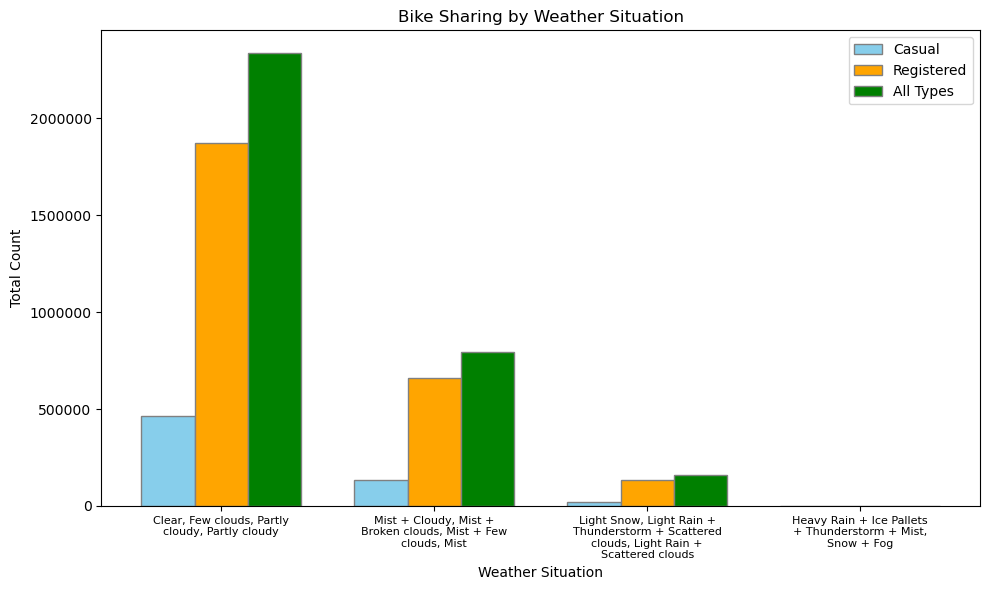

In [75]:
bar_width = 0.25

x_labels = rent_based_weather_df["weather_description"].values
x_labels = [textwrap.fill(label, 25) for label in x_labels]
r1 = np.arange(len(rent_based_weather_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(
    r1,
    rent_based_weather_df["casual_hour"],
    color="skyblue",
    width=bar_width,
    edgecolor="grey",
    label="Casual",
)
plt.bar(
    r2,
    rent_based_weather_df["registered_hour"],
    color="orange",
    width=bar_width,
    edgecolor="grey",
    label="Registered",
)
plt.bar(
    r3,
    rent_based_weather_df["cnt_hour"],
    color="green",
    width=bar_width,
    edgecolor="grey",
    label="All Types",
)

plt.ticklabel_format(style='plain')
plt.xlabel("Weather Situation")
plt.ylabel("Total Count")
plt.title("Bike Sharing by Weather Situation")
plt.xticks(r1 + bar_width, x_labels, ha="center", fontsize=8)
plt.legend()
plt.tight_layout()

plt.show()

#### Jumlah peminjaman sepeda yang dikelompokan berdasarkan tipe cuaca untuk seluruh tipe peminjaman berdasarkan bulan dan tahun

In [76]:
weather_cnt_month_year_df = day_hour_df.groupby(by=[
    day_based_df["dteday"].dt.year.rename("year"),
    day_based_df["dteday"].dt.month.rename("month"),
    "weathersit_hour"
])[["cnt_hour", "casual_hour", "registered_hour"]].sum().reset_index()

In [77]:
weather_cnt_month_year_df["month_year"] = pd.to_datetime(
    weather_cnt_month_year_df["year"].astype(int).astype(str) + "-" + weather_cnt_month_year_df["month"].astype(int).astype(str),
    format="%Y-%m",
)

In [78]:
weather_cnt_month_year_df['weather_description'] = weather_cnt_month_year_df['weathersit_hour'].map(weather_mapping)

In [79]:
weather_cnt_month_year_df = weather_cnt_month_year_df.drop(columns=['year', 'month'])

In [80]:
weather_cnt_month_year_df

,weathersit_hour,cnt_hour,casual_hour,registered_hour,month_year,weather_description
0,1,313,28,285,2011-01-01,"Clear, Few clouds, Partly cloudy, Partly cloudy"
1,2,152,18,134,2011-01-01,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,1,385,57,328,2011-02-01,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,2,144,24,120,2011-02-01,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
4,3,27,1,26,2011-02-01,"Light Snow, Light Rain + Thunderstorm + Scatte..."
...,...,...,...,...,...,...
64,2,606,79,527,2012-11-01,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
65,3,15,1,14,2012-11-01,"Light Snow, Light Rain + Thunderstorm + Scatte..."
66,1,654,50,604,2012-12-01,"Clear, Few clouds, Partly cloudy, Partly cloudy"
67,2,648,48,600,2012-12-01,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."


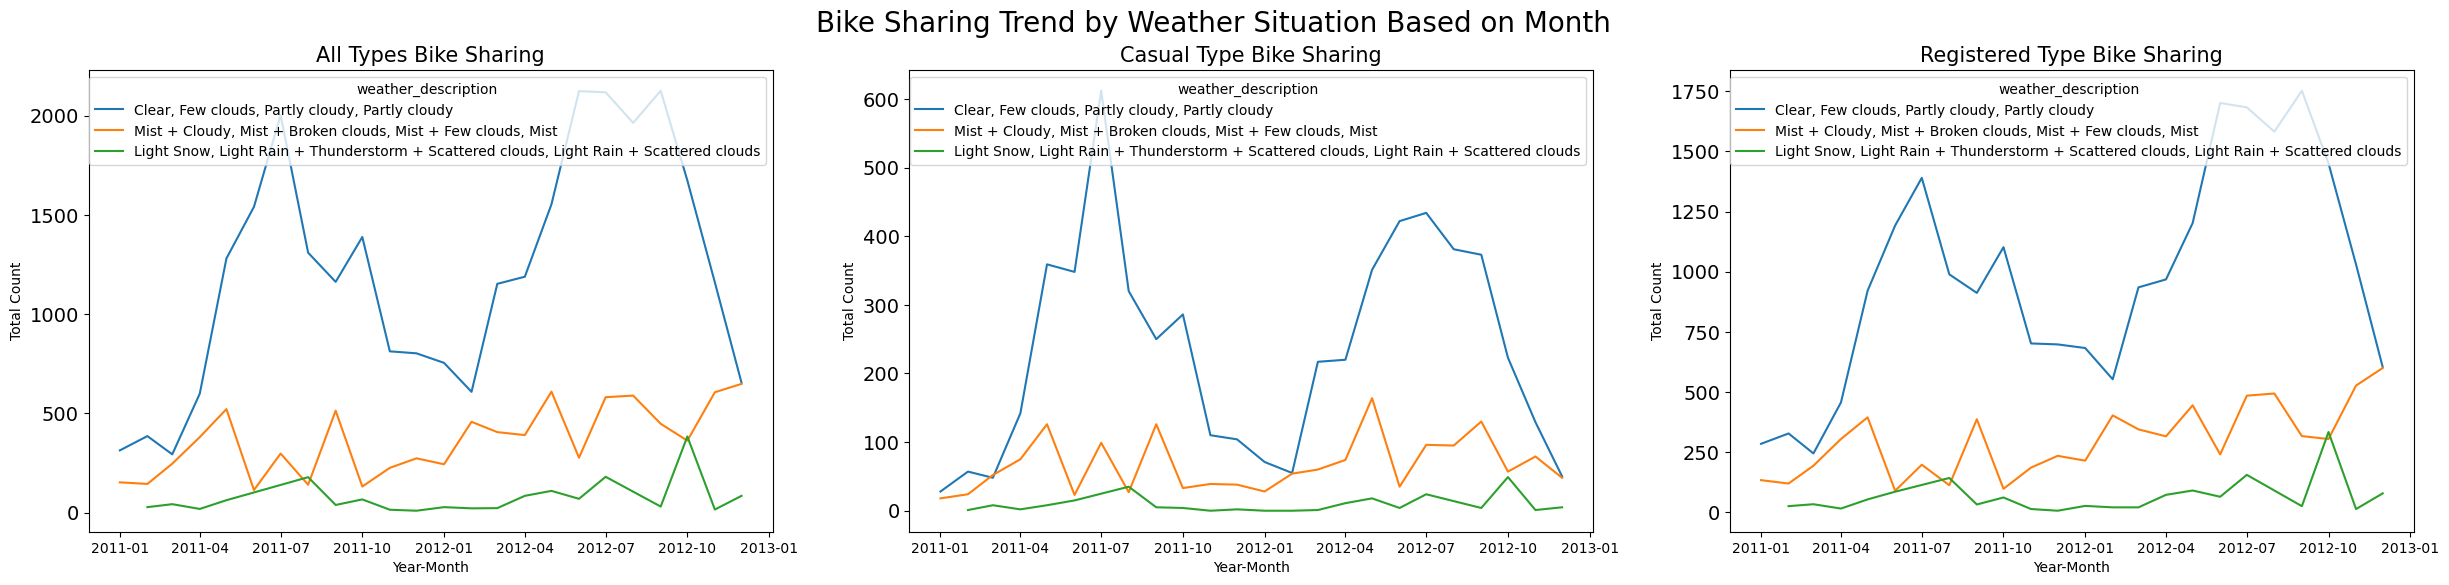

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.lineplot(x="month_year", y="cnt_hour", hue="weather_description", data=weather_cnt_month_year_df, ax=ax[0])
ax[0].set_ylabel("Total Count")
ax[0].set_xlabel("Year-Month")
ax[0].set_title("All Types Bike Sharing", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=14)

sns.lineplot(x="month_year", y="casual_hour", hue="weather_description", data=weather_cnt_month_year_df, ax=ax[1])
ax[1].set_ylabel("Total Count")
ax[1].set_xlabel("Year-Month")
ax[1].set_title("Casual Type Bike Sharing", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=14)

sns.lineplot(x="month_year", y="registered_hour", hue="weather_description", data=weather_cnt_month_year_df, ax=ax[2])
ax[2].set_ylabel("Total Count")
ax[2].set_xlabel("Year-Month")
ax[2].set_title("Registered Type Bike Sharing", loc="center", fontsize=15)
ax[2].tick_params(axis='y', labelsize=14)

plt.suptitle("Bike Sharing Trend by Weather Situation Based on Month", fontsize=20)
plt.show()

#### Jumlah peminjaman sepeda yang dikelompokan berdasarkan tipe cuaca untuk seluruh tipe peminjaman berdasarkan musim dan tahun

In [82]:
weather_cnt_season_year_df = day_hour_df.groupby(by=[
    day_based_df["dteday"].dt.year.rename("year"),
    "season",
    "weathersit_hour",
])[["cnt_hour", "casual_hour", "registered_hour"]].sum().reset_index()

In [83]:
weather_cnt_season_year_df['weather_description'] = weather_cnt_season_year_df['weathersit_hour'].map(weather_mapping)

In [84]:
weather_cnt_season_year_df['season_description'] = weather_cnt_season_year_df['season'].map(season_mapping)

In [85]:
weather_cnt_season_year_df["season_year"] = (
    weather_cnt_season_year_df["year"].astype(int).astype(str) + "-" + weather_cnt_season_year_df["season_description"]
)

In [86]:
weather_cnt_season_year_df = weather_cnt_season_year_df.drop(columns=['year', 'season', 'season_description'])

In [87]:
weather_cnt_season_year_df

,weathersit_hour,cnt_hour,casual_hour,registered_hour,weather_description,season_year
0,1,1003,140,863,"Clear, Few clouds, Partly cloudy, Partly cloudy",2011-springer
1,2,608,107,501,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2011-springer
2,3,51,6,45,"Light Snow, Light Rain + Thunderstorm + Scatte...",2011-springer
3,1,3013,752,2261,"Clear, Few clouds, Partly cloudy, Partly cloudy",2011-summer
4,2,1029,219,810,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2011-summer
5,3,176,23,153,"Light Snow, Light Rain + Thunderstorm + Scatte...",2011-summer
6,1,4670,1249,3421,"Clear, Few clouds, Partly cloudy, Partly cloudy",2011-fall
7,2,762,214,548,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2011-fall
8,3,248,47,201,"Light Snow, Light Rain + Thunderstorm + Scatte...",2011-fall
9,1,3199,523,2676,"Clear, Few clouds, Partly cloudy, Partly cloudy",2011-winter


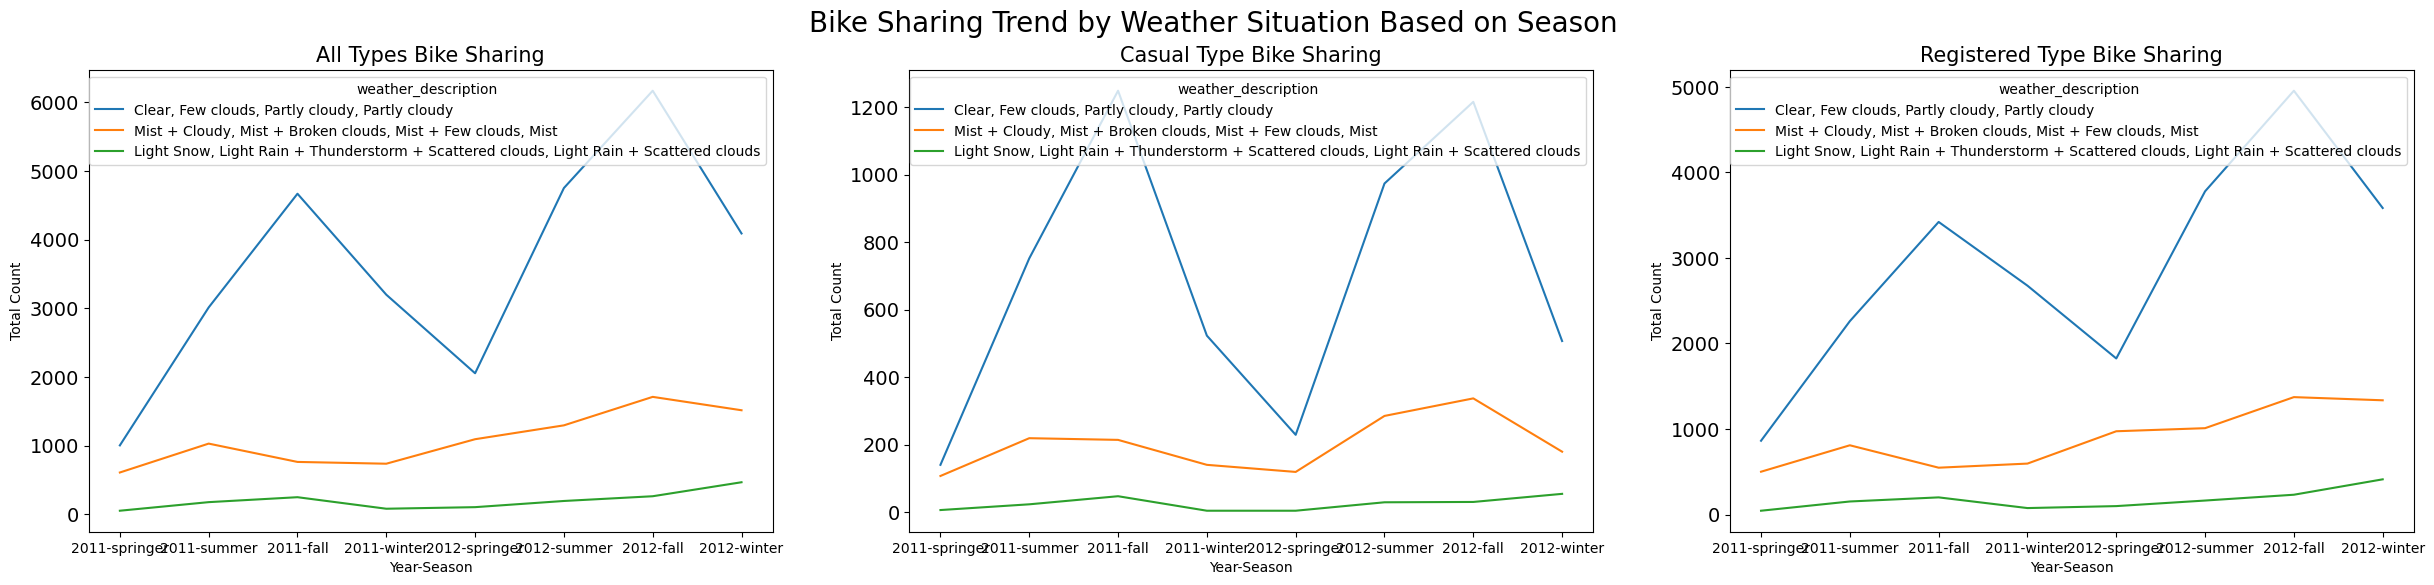

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.lineplot(x="season_year", y="cnt_hour", hue="weather_description", data=weather_cnt_season_year_df, ax=ax[0])
ax[0].set_ylabel("Total Count")
ax[0].set_xlabel("Year-Season")
ax[0].set_title("All Types Bike Sharing", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=14)

sns.lineplot(x="season_year", y="casual_hour", hue="weather_description", data=weather_cnt_season_year_df, ax=ax[1])
ax[1].set_ylabel("Total Count")
ax[1].set_xlabel("Year-Season")
ax[1].set_title("Casual Type Bike Sharing", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=14)

sns.lineplot(x="season_year", y="registered_hour", hue="weather_description", data=weather_cnt_season_year_df, ax=ax[2])
ax[2].set_ylabel("Total Count")
ax[2].set_xlabel("Year-Season")
ax[2].set_title("Registered Type Bike Sharing", loc="center", fontsize=15)
ax[2].tick_params(axis='y', labelsize=14)

plt.suptitle("Bike Sharing Trend by Weather Situation Based on Season", fontsize=20)
plt.show()

### Pertanyaan 2: Kapan peminjaman paling banyak dan paling sedikit dilakukan? (Berdasarkan tahun, musim, bulan, hari, jam)

#### Berdasarkan tahun

In [89]:
rent_based_year_df = day_based_df.groupby(by=day_based_df['dteday'].dt.year.rename('year')).agg({
    "casual_day": "sum",
    "registered_day": "sum",
    "cnt_day": "sum",
})

In [90]:
rent_based_year_df = rent_based_year_df.reset_index()

In [91]:
rent_based_year_df

,year,casual_day,registered_day,cnt_day
0,2011,247252,995851,1243103
1,2012,372765,1676811,2049576


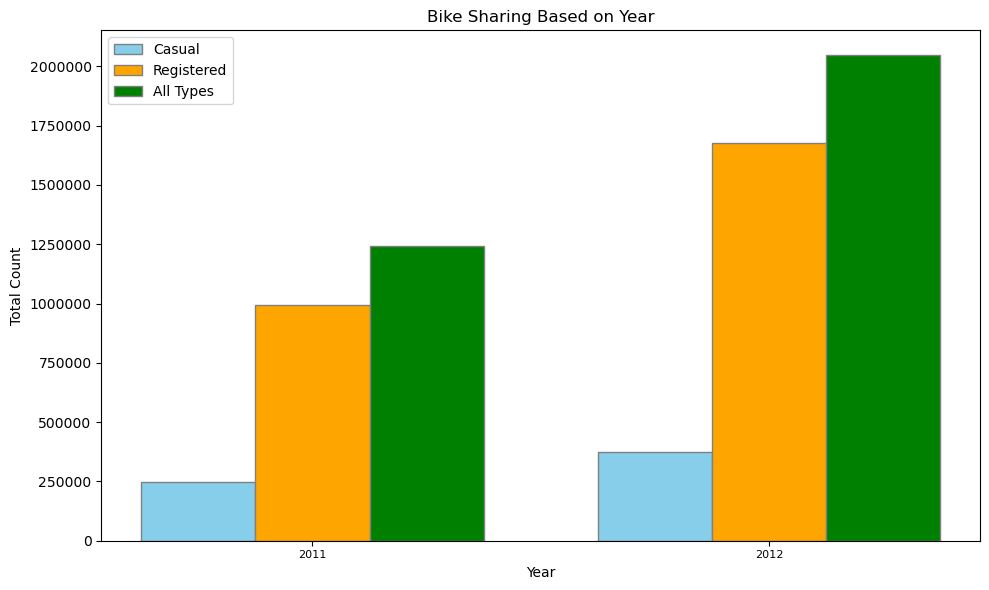

In [92]:
bar_width = 0.25

x_labels = rent_based_year_df["year"].values
r1 = np.arange(len(rent_based_year_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(
    r1,
    rent_based_year_df["casual_day"],
    color="skyblue",
    width=bar_width,
    edgecolor="grey",
    label=rename_bike_rent[0],
)
plt.bar(
    r2,
    rent_based_year_df["registered_day"],
    color="orange",
    width=bar_width,
    edgecolor="grey",
    label=rename_bike_rent[1],
)
plt.bar(
    r3,
    rent_based_year_df["cnt_day"],
    color="green",
    width=bar_width,
    edgecolor="grey",
    label=rename_bike_rent[2],
)

plt.ticklabel_format(style='plain')
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.title("Bike Sharing Based on Year")
plt.xticks(r1 + bar_width, x_labels, ha="center", fontsize=8)
plt.legend()
plt.tight_layout()

plt.show()

#### Berdasarkan musim pada seluruh tahun

In [93]:
rent_based_season_year_df = day_based_df.groupby([day_based_df['dteday'].dt.year.rename('year'), "season"]).agg({
    "casual_day": "sum",
    "registered_day": "sum",
    "cnt_day": "sum",
})

In [94]:
rent_based_season_year_df = rent_based_season_year_df.reset_index()

In [95]:
rent_based_season_year_df['season_description'] = rent_based_season_year_df['season'].map(season_mapping)

In [96]:
rent_based_season_year_df["season_year"] = (
    rent_based_season_year_df["year"].astype(int).astype(str) + "-" + rent_based_season_year_df["season_description"]
)

In [97]:
rent_based_season_year_df = rent_based_season_year_df.drop(columns=['year', 'season', 'season_description'])

In [98]:
rent_based_season_year_df

,casual_day,registered_day,cnt_day,season_year
0,21425,128575,150000,2011-springer
1,77564,269752,347316,2011-summer
2,95450,324200,419650,2011-fall
3,52813,273324,326137,2011-winter
4,39197,282151,321348,2012-springer
5,125958,445315,571273,2012-summer
6,130641,510838,641479,2012-fall
7,76969,438507,515476,2012-winter


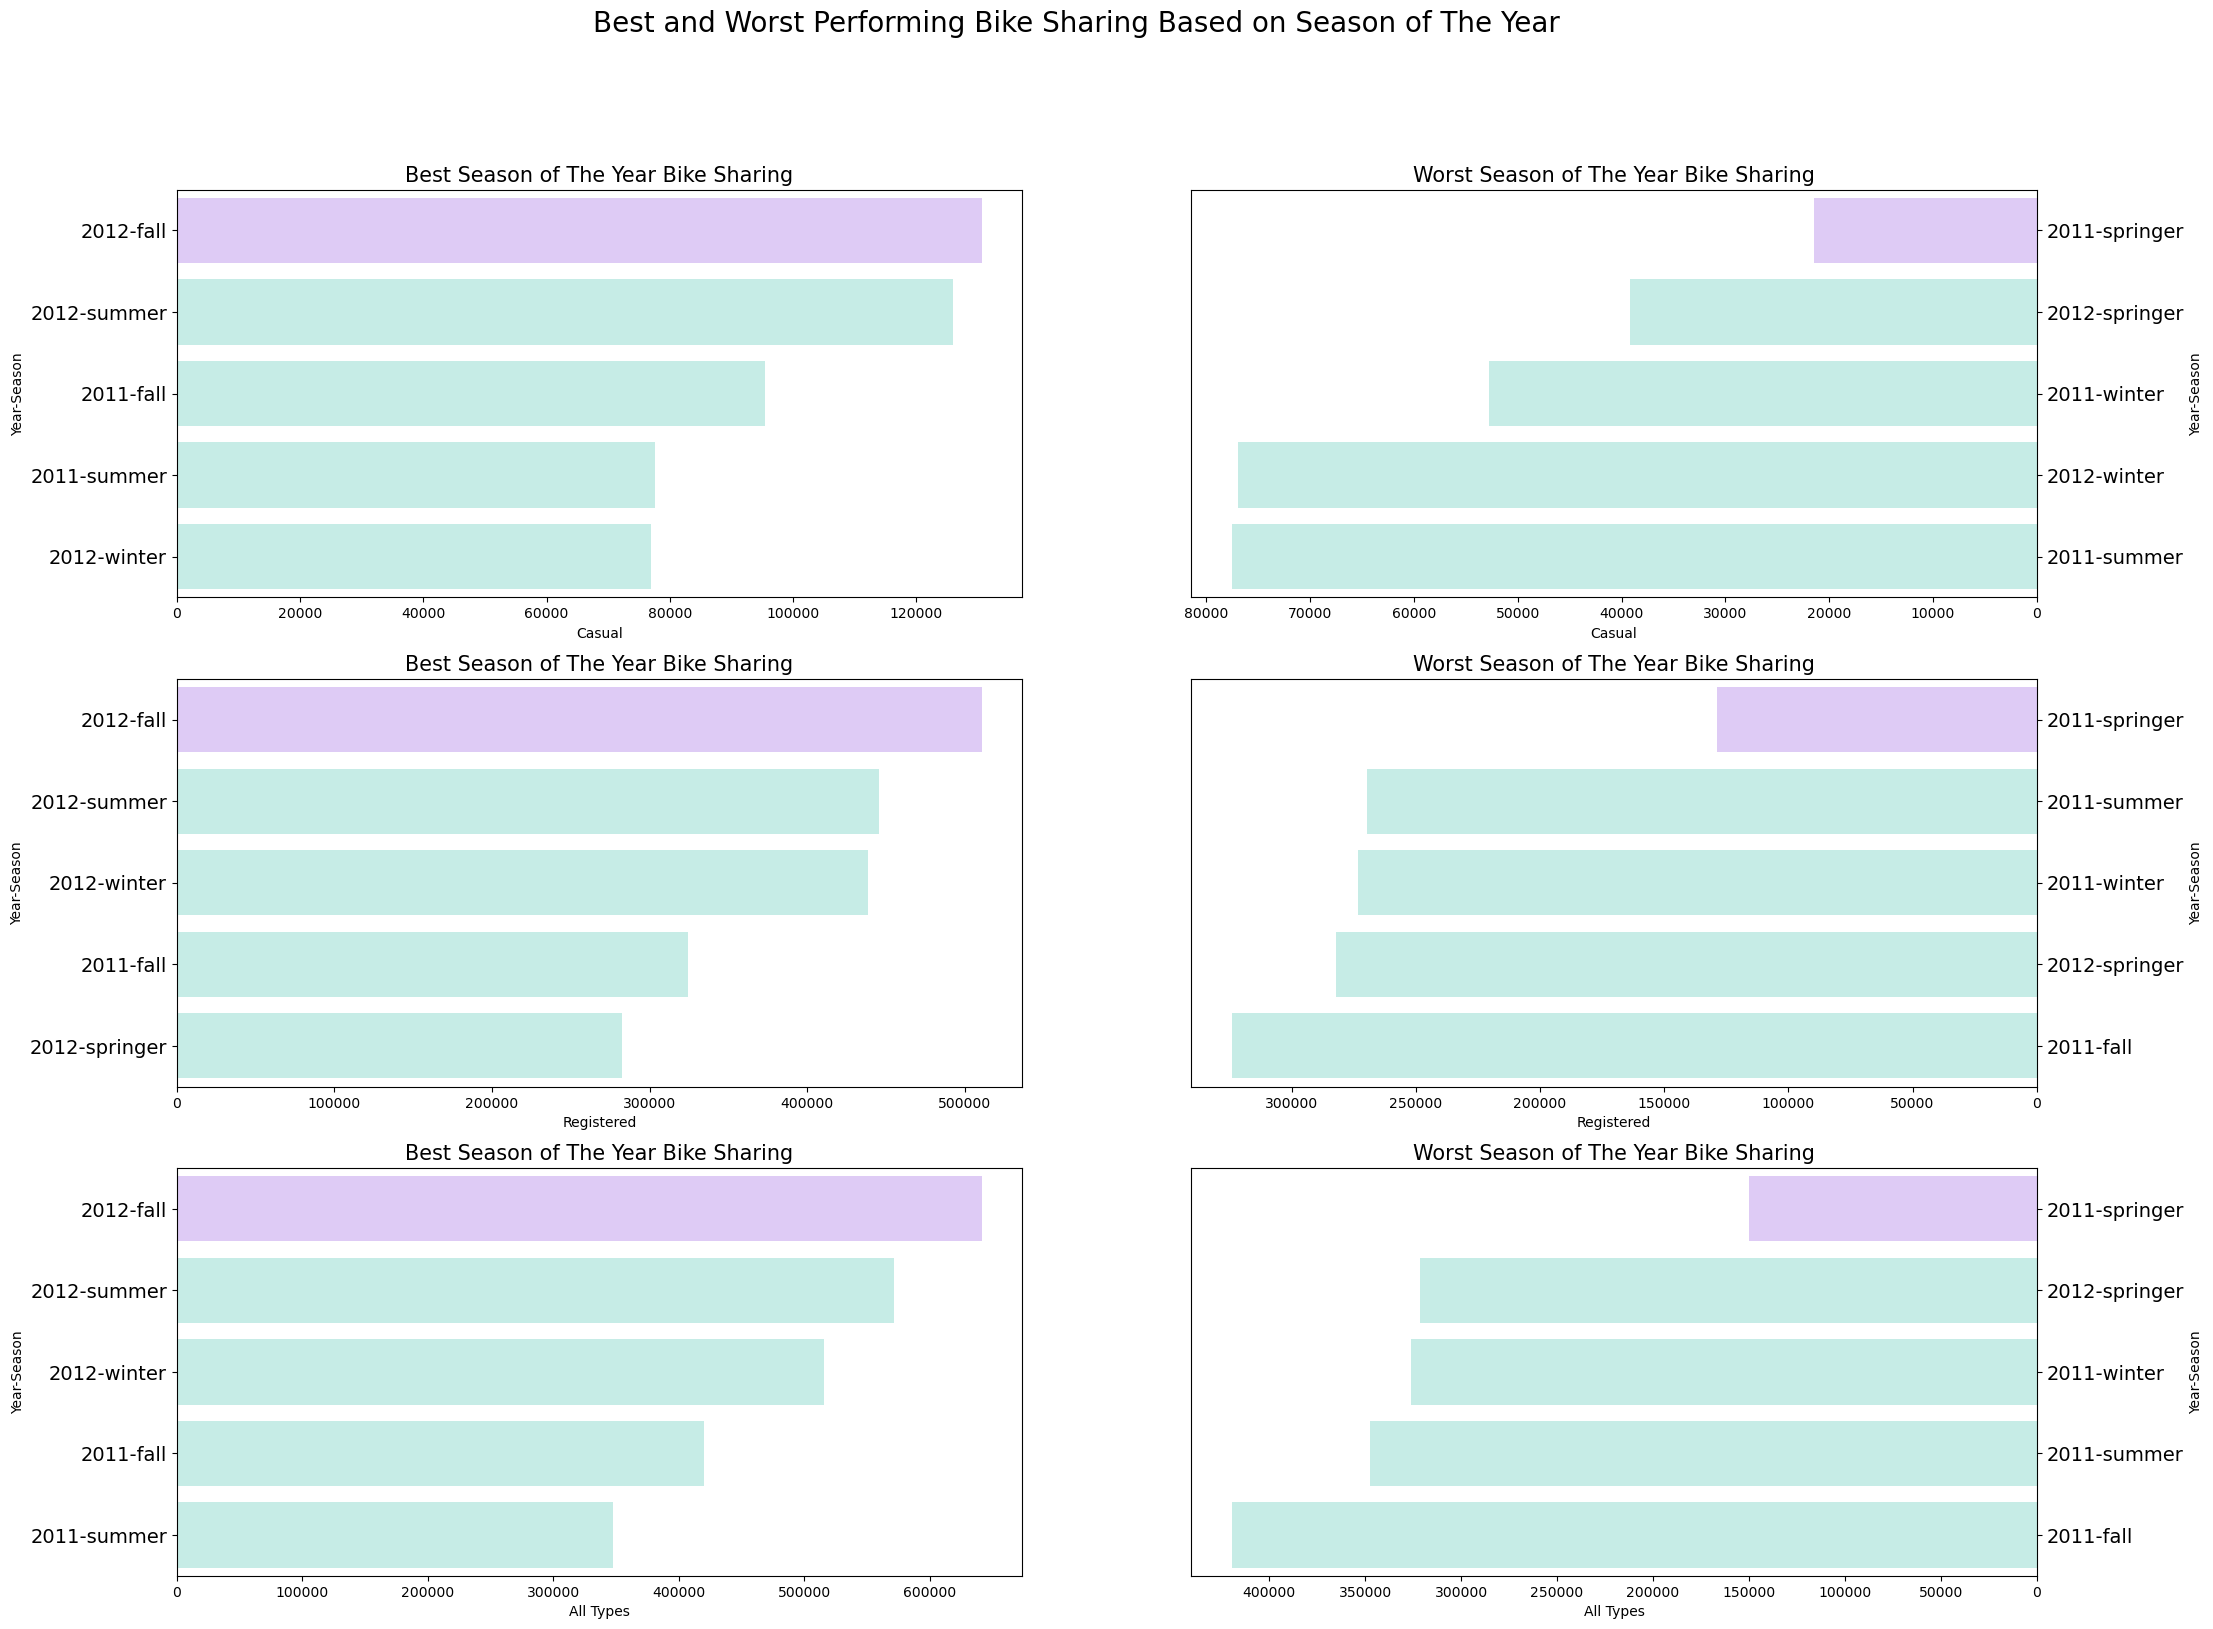

In [99]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(24, 18))

colors = ["#DEC4FC", "#C0F2EA", "#C0F2EA", "#C0F2EA", "#C0F2EA"]
ax = ax.flatten()

for i in range(0, len(column_bike_rent)):
    sns.barplot(x=column_bike_rent[i], y="season_year", data=rent_based_season_year_df.sort_values(by=column_bike_rent[i], ascending=False).head(5), palette=colors, ax=ax[i*2])
    ax[i*2].set_ylabel("Year-Season")
    ax[i*2].set_xlabel(rename_bike_rent[i])
    ax[i*2].set_title("Best Season of The Year Bike Sharing", loc="center", fontsize=15)
    ax[i*2].tick_params(axis='y', labelsize=14)

    sns.barplot(x=column_bike_rent[i], y="season_year", data=rent_based_season_year_df.sort_values(by=column_bike_rent[i], ascending=True).head(5), palette=colors, ax=ax[i*2+1])
    ax[i*2+1].set_ylabel("Year-Season")
    ax[i*2+1].set_xlabel(rename_bike_rent[i])
    ax[i*2+1].invert_xaxis()
    ax[i*2+1].yaxis.set_label_position("right")
    ax[i*2+1].yaxis.tick_right()
    ax[i*2+1].set_title("Worst Season of The Year Bike Sharing", loc="center", fontsize=15)
    ax[i*2+1].tick_params(axis='y', labelsize=14)

plt.suptitle("Best and Worst Performing Bike Sharing Based on Season of The Year", fontsize=20)
plt.show()

#### Berdasarkan bulan pada seluruh tahun

In [100]:
rent_based_month_year_df = day_based_df.groupby([day_based_df['dteday'].dt.year.rename('year'), day_based_df['dteday'].dt.month.rename('month')]).agg({
    "casual_day": "sum",
    "registered_day": "sum",
    "cnt_day": "sum",
})

In [101]:
rent_based_month_year_df = rent_based_month_year_df.reset_index()

In [102]:
rent_based_month_year_df["month_year"] = pd.to_datetime(
    rent_based_month_year_df["year"].astype(int).astype(str) + "-" + rent_based_month_year_df["month"].astype(int).astype(str),
    format="%Y-%m",
).dt.strftime('%Y-%m')

In [103]:
rent_based_month_year_df = rent_based_month_year_df.drop(columns=['year', 'month'])

In [104]:
rent_based_month_year_df

,casual_day,registered_day,cnt_day,month_year
0,3073,35116,38189,2011-01
1,6242,41973,48215,2011-02
2,12826,51219,64045,2011-03
3,22346,72524,94870,2011-04
4,31050,104771,135821,2011-05
5,30612,112900,143512,2011-06
6,36452,104889,141341,2011-07
7,28842,107849,136691,2011-08
8,26545,100873,127418,2011-09
9,25222,98289,123511,2011-10


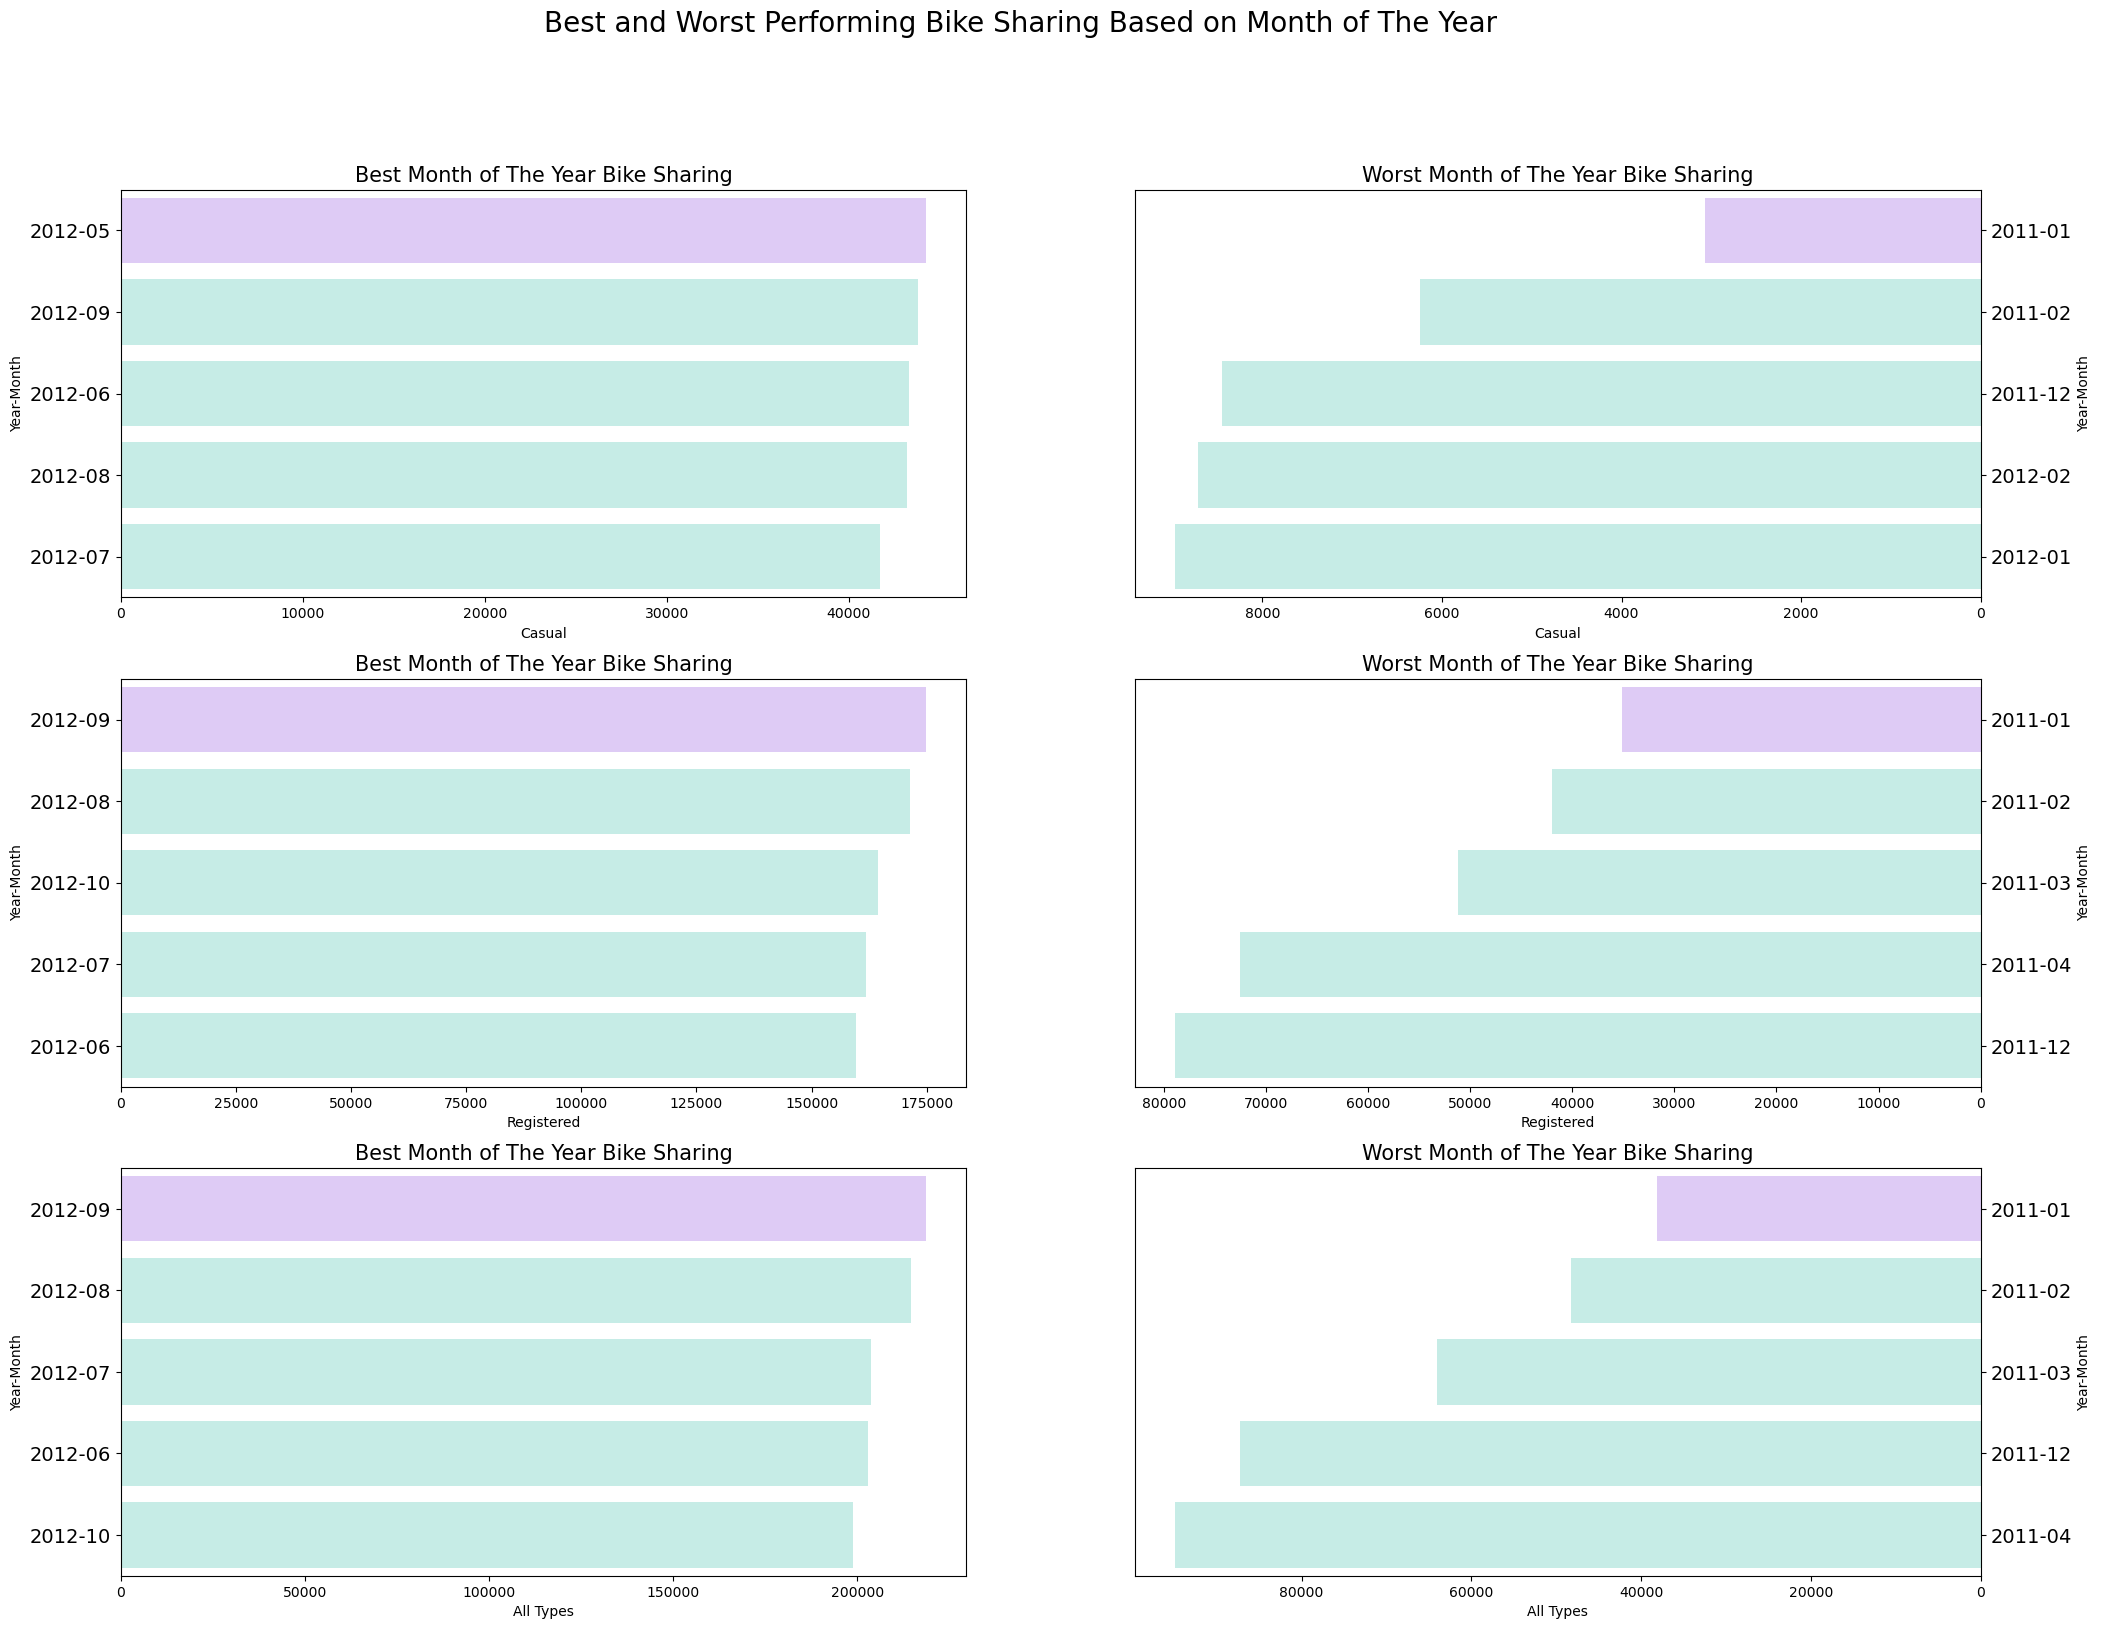

In [105]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(24, 18))

colors = ["#DEC4FC", "#C0F2EA", "#C0F2EA", "#C0F2EA", "#C0F2EA"]
ax = ax.flatten()

for i in range(0, len(column_bike_rent)):
    sns.barplot(x=column_bike_rent[i], y="month_year", data=rent_based_month_year_df.sort_values(by=column_bike_rent[i], ascending=False).head(5), palette=colors, ax=ax[i*2])
    ax[i*2].set_ylabel("Year-Month")
    ax[i*2].set_xlabel(rename_bike_rent[i])
    ax[i*2].set_title("Best Month of The Year Bike Sharing", loc="center", fontsize=15)
    ax[i*2].tick_params(axis='y', labelsize=14)

    sns.barplot(x=column_bike_rent[i], y="month_year", data=rent_based_month_year_df.sort_values(by=column_bike_rent[i], ascending=True).head(5), palette=colors, ax=ax[i*2+1])
    ax[i*2+1].set_ylabel("Year-Month")
    ax[i*2+1].set_xlabel(rename_bike_rent[i])
    ax[i*2+1].invert_xaxis()
    ax[i*2+1].yaxis.set_label_position("right")
    ax[i*2+1].yaxis.tick_right()
    ax[i*2+1].set_title("Worst Month of The Year Bike Sharing", loc="center", fontsize=15)
    ax[i*2+1].tick_params(axis='y', labelsize=14)

plt.suptitle("Best and Worst Performing Bike Sharing Based on Month of The Year", fontsize=20)
plt.show()

#### Berdasarkan jenis hari

In [106]:
rent_based_weekday_df = day_based_df.groupby(by="weekday").agg({
    "casual_day": "sum",
    "registered_day": "sum",
    "cnt_day": "sum",
})

In [107]:
rent_based_weekday_df = rent_based_weekday_df.reset_index()

In [108]:
rent_based_weekday_df['weekday_description'] = rent_based_weekday_df['weekday'].map(day_mapping)

In [109]:
rent_based_weekday_df = rent_based_weekday_df.drop(columns=['weekday'])

In [110]:
rent_based_weekday_df

,casual_day,registered_day,cnt_day,weekday_description
0,140521,303506,444027,Sunday
1,70784,384719,455503,Monday
2,57843,411266,469109,Tuesday
3,57319,415729,473048,Wednesday
4,61460,423935,485395,Thursday
5,78238,409552,487790,Friday
6,153852,323955,477807,Saturday


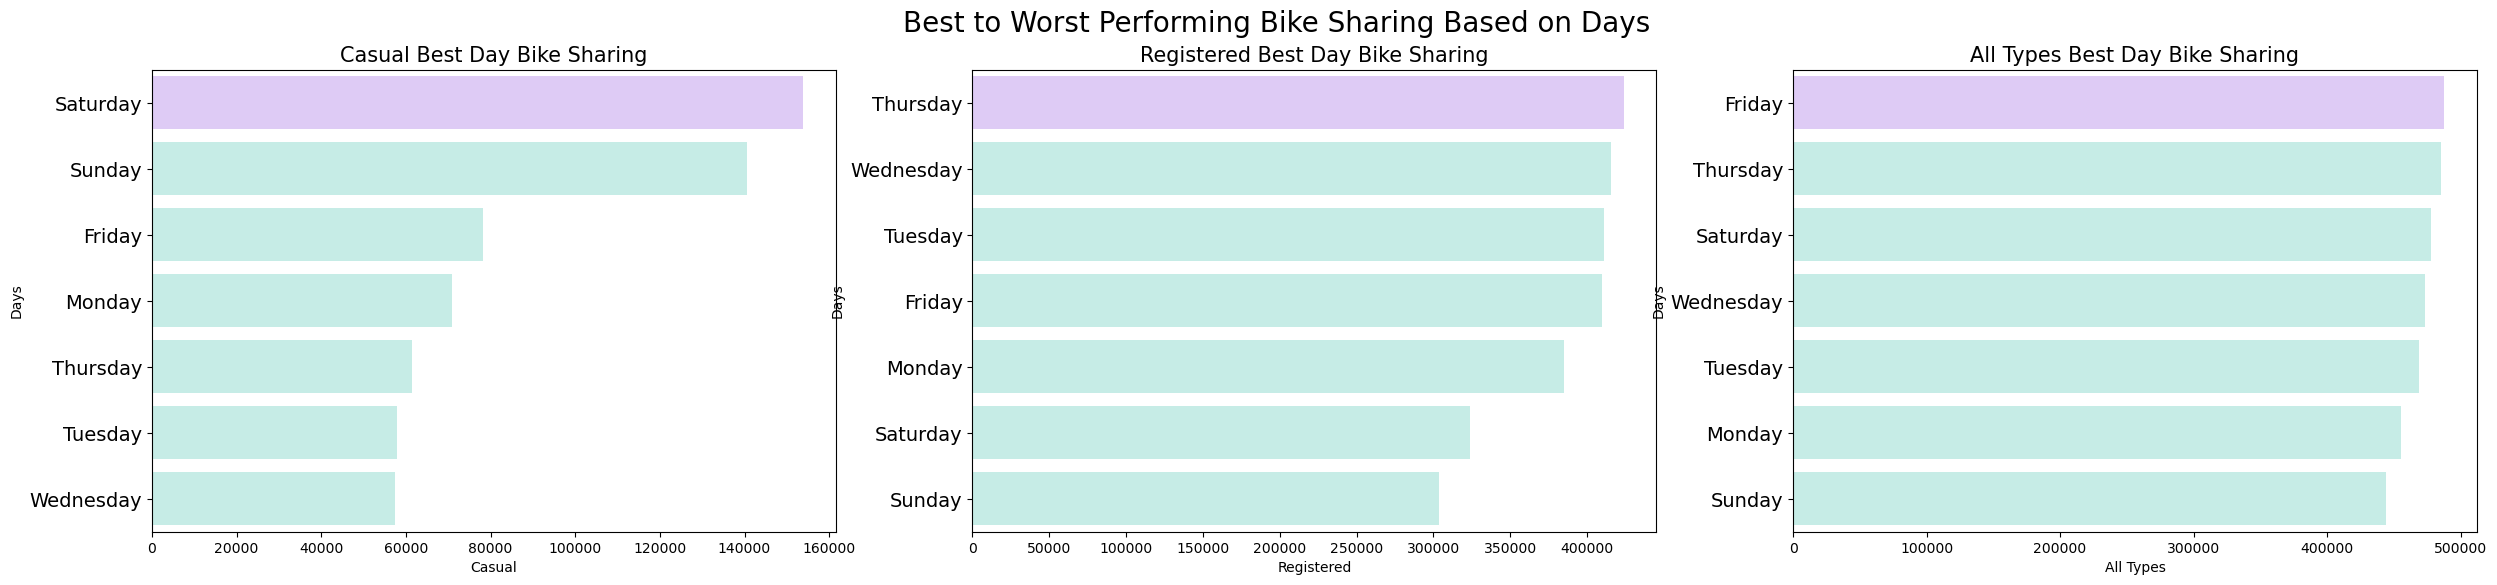

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6)) # Changed ncols to 3

colors = ["#DEC4FC", "#C0F2EA", "#C0F2EA", "#C0F2EA", "#C0F2EA", "#C0F2EA", "#C0F2EA"]

ax = ax.flatten()

for i in range(0, len(column_bike_rent)):
    sns.barplot(x=column_bike_rent[i], y="weekday_description", data=rent_based_weekday_df.sort_values(by=column_bike_rent[i], ascending=False), palette=colors, ax=ax[i])
    ax[i].set_ylabel("Days")
    ax[i].set_xlabel(rename_bike_rent[i])
    ax[i].set_title(rename_bike_rent[i] + " Best Day Bike Sharing", loc="center", fontsize=15)
    ax[i].tick_params(axis='y', labelsize=14)

plt.suptitle("Best to Worst Performing Bike Sharing Based on Days", fontsize=20)
plt.show()

#### Berdasarkan hari kerja dan libur

In [112]:
rent_based_workingday_df = day_based_df.groupby(by="workingday").agg({
    "casual_day": "mean",
    "registered_day": "mean",
    "cnt_day": "mean",
})

In [113]:
rent_based_workingday_df = rent_based_workingday_df.reset_index()

In [114]:
rent_based_workingday_df['workingday_description'] = rent_based_workingday_df['workingday'].map(day_type_mapping)

In [115]:
rent_based_workingday_df = rent_based_workingday_df.drop(columns=['workingday'])

In [116]:
rent_based_workingday_df

,casual_day,registered_day,cnt_day,workingday_description
0,1371.134199,2959.034632,4330.168831,weekend or holiday
1,606.570000,3978.250000,4584.820000,working day


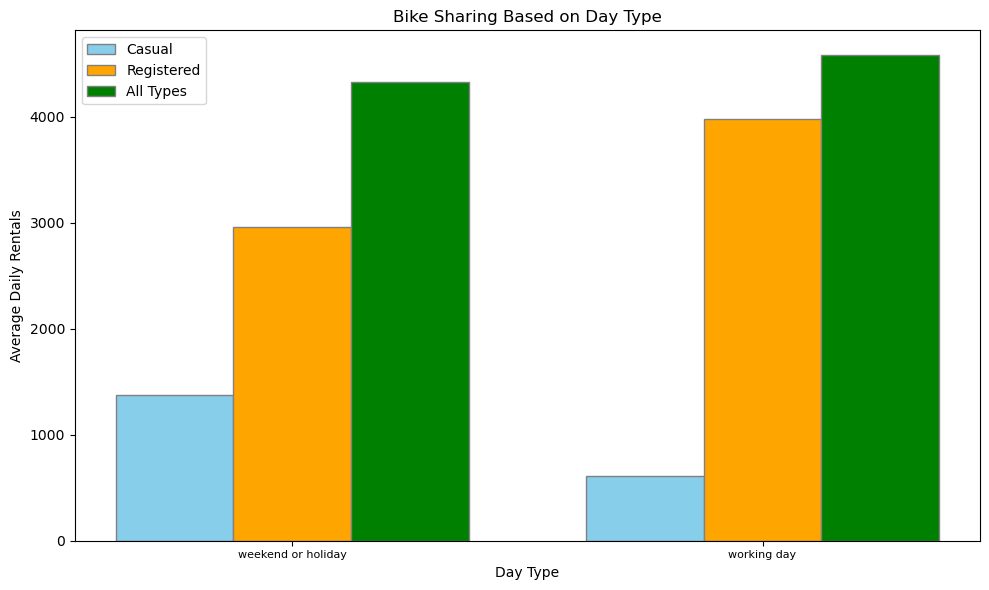

In [117]:
bar_width = 0.25

x_labels = rent_based_workingday_df["workingday_description"].values
r1 = np.arange(len(rent_based_workingday_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(
    r1,
    rent_based_workingday_df["casual_day"],
    color="skyblue",
    width=bar_width,
    edgecolor="grey",
    label=rename_bike_rent[0],
)
plt.bar(
    r2,
    rent_based_workingday_df["registered_day"],
    color="orange",
    width=bar_width,
    edgecolor="grey",
    label=rename_bike_rent[1],
)
plt.bar(
    r3,
    rent_based_workingday_df["cnt_day"],
    color="green",
    width=bar_width,
    edgecolor="grey",
    label=rename_bike_rent[2],
)

plt.ticklabel_format(style='plain')
plt.xlabel("Day Type")
plt.ylabel("Average Daily Rentals")
plt.title("Bike Sharing Based on Day Type")
plt.xticks(r1 + bar_width, x_labels, ha="center", fontsize=8)
plt.legend()
plt.tight_layout()

plt.show()

#### Berdasarkan jam

In [118]:
rent_based_hour_df = day_hour_df.groupby(by="hr").agg({
  "casual_hour": "sum",
  "registered_hour": "sum",
  "cnt_hour": "sum",
})

In [119]:
rent_based_hour_df = rent_based_hour_df.reset_index()

In [121]:
rent_based_hour_df['hour'] = rent_based_hour_df['hr'].astype(str)

In [122]:
rent_based_hour_df = rent_based_hour_df.drop(columns=['hr'])

In [123]:
rent_based_hour_df

,casual_hour,registered_hour,cnt_hour,hour
0,7375,31755,39130,0
1,4709,19455,24164,1
2,3412,12940,16352,2
3,1893,6281,8174,3
4,874,3554,4428,4
5,1012,13249,14261,5
6,3017,52115,55132,6
7,8037,146134,154171,7
8,15761,245240,261001,8
9,22458,136980,159438,9


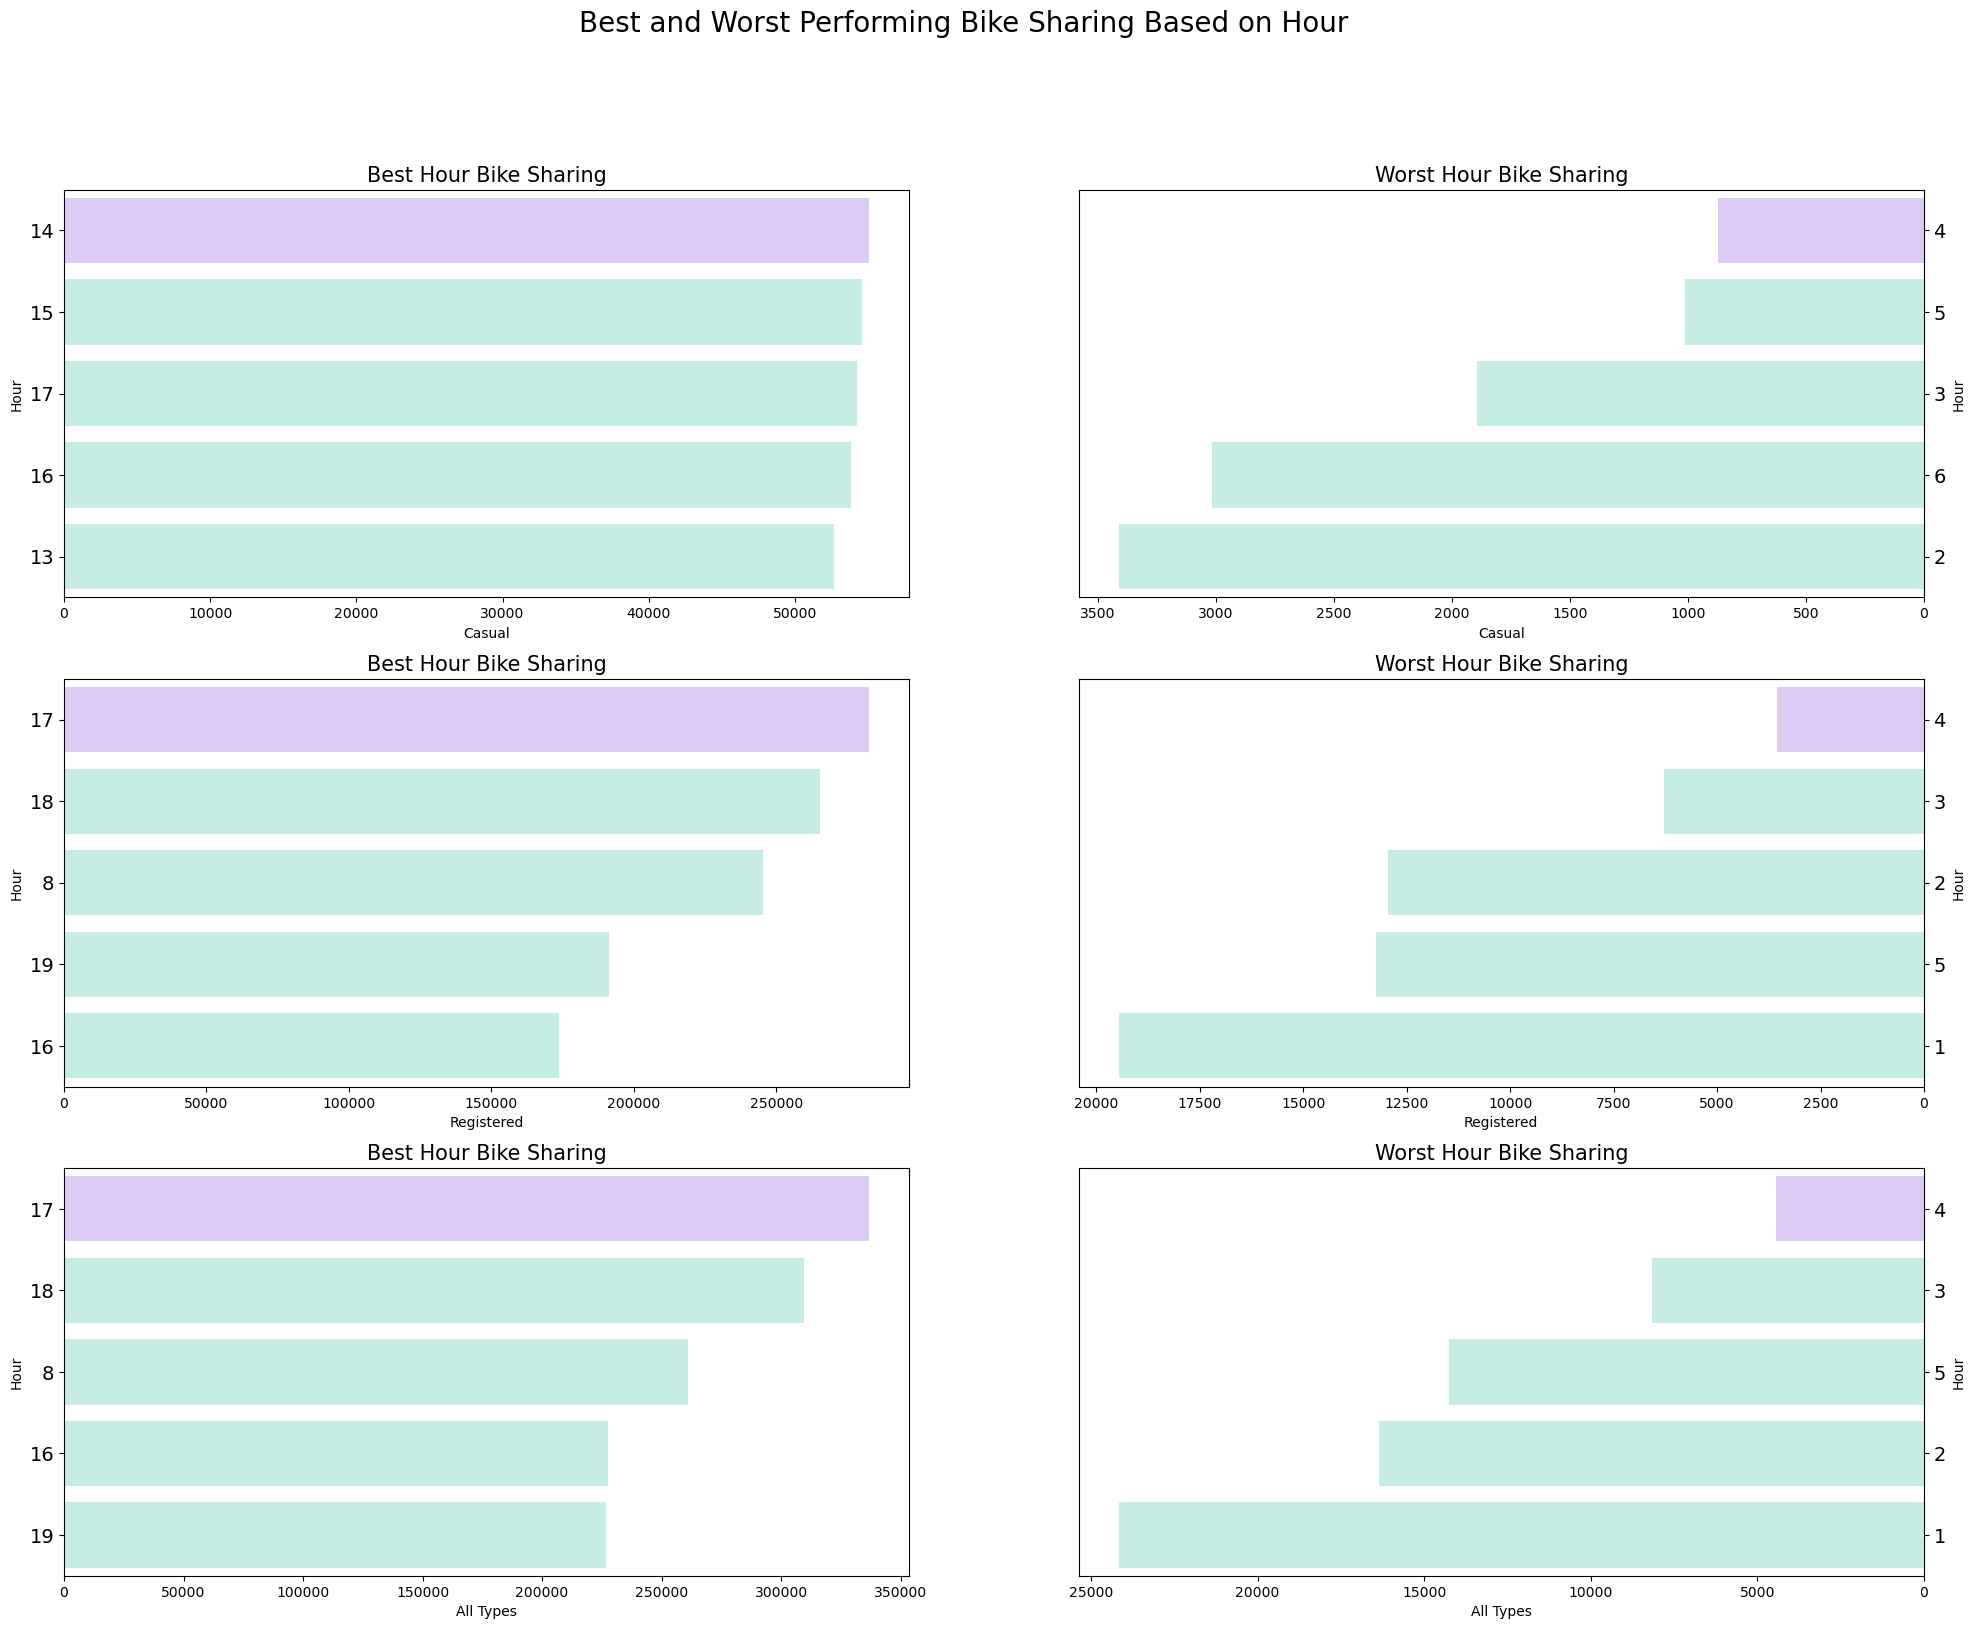

In [124]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(24, 18))

colors = ["#DEC4FC", "#C0F2EA", "#C0F2EA", "#C0F2EA", "#C0F2EA"]
ax = ax.flatten()

for i in range(0, len(column_bike_rent_hour)):
    sns.barplot(x=column_bike_rent_hour[i], y="hour", data=rent_based_hour_df.sort_values(by=column_bike_rent_hour[i], ascending=False).head(5), palette=colors, ax=ax[i*2])
    ax[i*2].set_ylabel("Hour")
    ax[i*2].set_xlabel(rename_bike_rent[i])
    ax[i*2].set_title("Best Hour Bike Sharing", loc="center", fontsize=15)
    ax[i*2].tick_params(axis='y', labelsize=14)

    sns.barplot(x=column_bike_rent_hour[i], y="hour", data=rent_based_hour_df.sort_values(by=column_bike_rent_hour[i], ascending=True).head(5), palette=colors, ax=ax[i*2+1])
    ax[i*2+1].set_ylabel("Hour")
    ax[i*2+1].set_xlabel(rename_bike_rent[i])
    ax[i*2+1].invert_xaxis()
    ax[i*2+1].yaxis.set_label_position("right")
    ax[i*2+1].yaxis.tick_right()
    ax[i*2+1].set_title("Worst Hour Bike Sharing", loc="center", fontsize=15)
    ax[i*2+1].tick_params(axis='y', labelsize=14)

plt.suptitle("Best and Worst Performing Bike Sharing Based on Hour", fontsize=20)
plt.show()

**Insight:**
- Peminjaman paling sering dilakukan Ketika cuaca baik yaitu clear, few clouds, partly cloudy, partly cloudy.
- Puncak peminjaman untuk registered dan all types terjadi ketika 2012-fall. Namun, berbeda dengan casual yang terjadi pada bulan Juli 2011 dan 2011-fall.
- Berdasarkan tahun, peminjaman sepeda mengalami peningkatan pada tahun 2012.
- Untuk setiap tipe peminjaman, peminjaman sepeda terendah terjadi pada 2011-springer dan Januari 2011. Sebaliknya, peminjaman tertinggi umumnya pada 2012-fall. Sedangkan, peminjaman tertinggi bervariasi dalam kategori bulan dan tahun untuk tipe casual pada Mei 2012 dan kedua registered serta jumlah seluruh tipe atau all types pada September 2012.
- Berdasarkan jumlah pada kategori harian, terdapat variasi yaitu Sabtu untuk tipe casual, Kamis untuk tipe registered, dan Jum'at untuk semua tipe.
- Peminjaman terbanyak berdasarkan nilai rata-rata terjadi pada hari kerja untuk tipe registered dan semua tipe. Sedangkan tipe casual terbanyak Ketika akhir pekan atau hari libur.
- Jam peminjaman paling sedikit dilaukan pada pukul 4 dan terbanyak pada pukul 14 bagi tipe casual serta pukul 17 bagi tipe registered dan seluruh tipe.

## Conclusion

- Peminjaman sepeda paling sedikit dilakukan dalam cuaca buruk yaitu Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog. Sebaliknya peminjaman sepeda pada setiap musim dan bulan umumnya paling tinggi dilakukan ketika cuaca dalam kondisi baik yaitu Clear, Few clouds, Partly cloudy. Walaupun kategori cuaca baik memiliki jumlah peminjaman tertinggi, tentunya terjadi penurunan pada musim semi 2011 dan 2012 serta sekitar bulan Februari 2012.
- Peminjaman sepeda mengalami peningkatan dari tahun 2011 hingga tahun 2012. Paling sedikit peminjaman dilakukan pada Januari 2011. Sedangkan puncaknya terjadi pada musim gugur tahun 2012. Selain itu, peminjaman paling banyak dilakukan pada hari kerja dan jam 17.

In [125]:
day_hour_df.to_csv("dashboard/main_data.csv", index=False)